# **Análisis de Sentimiento y Predicción en Reseñas de Equipos Musicales**

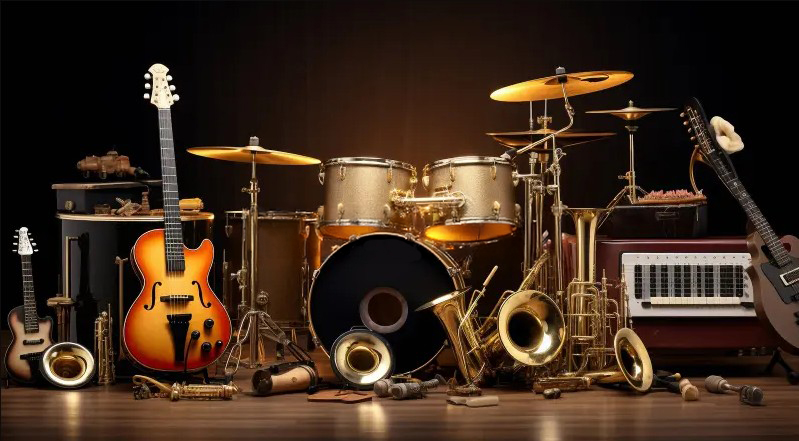

### **Abstracto con Motivación y Audiencia**

Este proyecto surge de la necesidad de comprender y analizar las opiniones de los consumidores en el mercado de equipos musicales. En un mercado altamente competitivo y especializado, la interpretación sistemática de las reseñas de los consumidores ofrece una ventaja competitiva significativa. El análisis de sentimiento aplicado a estas reseñas permite extraer información valiosa sobre la satisfacción del cliente, características de productos valoradas y áreas de mejora.

Este análisis está dirigido a profesionales del sector musical, fabricantes de equipos musicales, minoristas especializados y equipos de marketing que buscan optimizar la experiencia del cliente basándose en feedback real. También resulta relevante para investigadores en el campo del procesamiento del lenguaje natural (NLP) y aprendizaje automático aplicado a análisis de sentimiento en mercados especializados.


### **Contexto Comercial**

El dataset contiene reseñas de consumidores sobre equipos musicales y productos relacionados. Estas reseñas incluyen calificaciones numéricas (de 1 a 5 estrellas), comentarios textuales y metadatos adicionales, representando la experiencia directa de músicos profesionales y aficionados con estos productos.

La industria de equipos musicales enfrenta desafíos específicos como:
*	Alta competencia entre marcas establecidas y nuevos fabricantes
*	Necesidad de mantener equilibrio entre tradición e innovación
*	Segmentos de mercado muy especializados con distintas necesidades
*	Importancia crítica de la reputación y la calidad percibida

Comprender el sentimiento del consumidor en este contexto permite mejorar productos, ajustar estrategias de mercado y responder efectivamente a las necesidades específicas de cada segmento.


**Posibles Aplicaciones Comerciales**

1.	Optimización de productos: Identificación de características específicas que los músicos valoran más en los afinadores, permitiendo el desarrollo de productos mejorados.
2.	Inteligencia competitiva: Análisis comparativo de sentimiento entre diferentes modelos o marcas de equipos musicales.
3.	Marketing personalizado: Segmentación de clientes basada en preferencias y necesidades específicas expresadas en las reseñas.
4.	Gestión de reputación: Sistema de alerta temprana para identificar problemas de calidad o servicio antes de que afecten significativamente la percepción de marca.
5.	Previsión de ventas: Modelos predictivos que correlacionen el sentimiento de las reseñas con el desempeño comercial de los productos.
6.	Mejora de descripciones de producto: Optimización de las descripciones de productos basadas en el lenguaje y características que los consumidores consideran importantes.


### **Contexto Analítico**

El dataset disponible, que contiene 10,261 instancias, presenta oportunidades para:

*	Análisis de sentimiento a partir del texto de las reseñas
*	Extracción de temas y características clave mencionadas por los consumidores
*	Modelado predictivo de calificaciones basado en el contenido textual
*	Análisis temporal de tendencias en la satisfacción del cliente


### **Hipótesis**

El problema que aborda este proyecto es la dificultad para extraer información valiosa de las reseñas textuales de equipos musicales y transformarla en conocimiento accionable para fabricantes y minoristas. Las siguientes hipótesis buscan responder a las preguntas fundamentales sobre la relación entre el lenguaje usado por los consumidores y su satisfacción con los productos:



*   **Patrones lingüísticos en calificaciones extremas**:
Las reseñas con calificaciones extremas (1 o 5 estrellas) contienen patrones lingüísticos distintivos y específicos (vocabulario técnico musical, estructuras gramaticales, intensificadores emocionales) que pueden ser identificados mediante técnicas avanzadas de NLP. Estos patrones serían significativamente diferentes entre sí y también distintos de los patrones presentes en reseñas de calificación intermedia.

*   **Predicción de calificación desde texto**:
Es posible desarrollar un modelo predictivo que estime con alta precisión (mayor al 80%) la calificación numérica que un usuario asignará a un equipo musical, basándose únicamente en el análisis del texto de su reseña mediante algoritmos de aprendizaje automático y procesamiento de lenguaje natural.

* **Extracción automática de características de producto influyentes**: Las características de producto que más influyen en la satisfacción del cliente (como facilidad de uso, precisión, durabilidad, diseño) pueden ser extraídas automáticamente mediante técnicas de procesamiento del lenguaje natural aplicadas al campo "reviewText", y estas características presentarán correlaciones significativas con la calificación general del producto.





### **Objetivos**

El proyecto se enfoca en transformar el análisis de las reseñas de equipos musicales en herramientas prácticas para la toma de decisiones empresariales. Los siguientes objetivos concretos guiarán el desarrollo del trabajo analítico:

* **Desarrollar un sistema avanzado de análisis de sentimiento**: Diseñar, implementar y validar un sistema de análisis de sentimiento específicamente calibrado para el mercado de equipos musicales, que clasifique con precisión las reseñas como positivas, negativas o neutras.

* **Implementar un modelo predictivo de calificaciones**: Construir un modelo predictivo basado en técnicas de aprendizaje automático que estime el sentimiento que un usuario tendría sobre un producto de equipo musical, utilizando exclusivamente el análisis del texto de su reseña. El modelo debe incorporar características lingüísticas específicas del dominio musical y ser capaz de interpretar tanto valoraciones explícitas como implícitas.

* **Extraer temas y características clave mencionadas por usuarios**: Implementar un sistema que extraiga automáticamente los temas recurrentes y características de producto mencionadas por los usuarios en sus reseñas mediante técnicas avanzadas de minería de texto, análisis semántico y modelado de tópicos.

# **Lectura de datos y Análisis Inicial**

## Instalación de librerías

In [1]:
!python -m spacy download en_core_web_md
!pip install -U symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 11.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 6.4 MB/s eta 0:00:00


### Importación de librerías

In [2]:
import nltk # importar natural language toolkit
nltk.download('punkt') # Tokenizador
nltk.download('stopwords') # Lista de stopwords en varios idiomas, incluido inglés
nltk.download('wordnet') # WordNet para lematización
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
import time
import spacy
import en_core_web_md
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter
import pickle
from textblob import TextBlob
import pkg_resources
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Configuración del entorno de Python en Google Colab

In [3]:
from google.colab import drive
import os
drive.mount("/content/drive")
os.chdir("/content/drive/My Drive/CODERHOUSE/MiProyecto")

Mounted at /content/drive


### Lectura del datase

In [5]:
# Lectura desde mi github
url = 'https://raw.githubusercontent.com/rodrigomartin129/Curso-Data-Science-III/refs/heads/main/Musical_instruments_Amazon_reviews.csv'
df = pd.read_csv(url, delimiter=",")


### Análisis inicial del dataset

In [6]:
# Se iniciará viendo 10 instancias random con sus respectivos valores
df.sample(6)

reviewerID        asin                      reviewerName helpful  \
5540    AD6FULWPPOJ3R  B000RYPN38  Big Daddy "Rock 'till you drop!"  [0, 0]   
3987   A1LS2UXHG1BYRG  B0009G1E0K          Carlos De Cunha "Carlos"  [0, 0]   
9094    AXP9CF1UTFRSU  B005CX4GLE                              tada  [0, 0]   
10023  A1LH6RF4UN9VI6  B00B1N06PO           E. D. Garcia "Biggie-E"  [6, 7]   
8065    A8OBY4EP2OCDZ  B003OUX8ZM                           Brendon  [2, 3]   
9578   A306YUQBEB2R9T  B0073XCXHA                              debi  [0, 0]   

                                              reviewText  overall  \
5540   Ok, 6 TRS patch cables, 6' long each for $30.0...      5.0   
3987   Cheap crappy strap. It's too stiff, not comfor...      1.0   
9094   Wanted to hang my guitars on the wall.  These ...      5.0   
10023  I've tried these out in head-to-head (excuse t...      5.0   
8065   I've had several PODs and have never really be...      5.0   
9578   Will work on any instrument.  You don't need t...      5.0   

                                        summary  unixReviewTime   reviewTime  
5540        Great price on an excellent product      1349913600  10 11, 2012  
3987   Cheap strap, no good. very uncomfortable      1386806400  12 12, 2013  
9094                                 I bought 3      1397606400  04 16, 2014  
10023                             A Good Value!      1365897600  04 14, 2013  
8065                           The best POD yet      1302220800   04 8, 2011  
9578                          Good lil' tuner..      1353542400  11 22, 2012

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [8]:
# Dicha tabla muestra la media, desviación standard, el valor mínimo, el primer cuartil, la mediana,
# el tercer cuartil y el valor máximo de cada variable de tipo número entero.
df.describe()

overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09

### Diccionario de variables

1. **reviewerID** - Identificador único del reseñador, por ejemplo: A37A41GWQFMK3D


2. **asin** - Identificador único del producto, por ejemplo: B0002OOMU8

3. **reviewerName** - Nombre del reseñador, por ejemplo: Ann Vande Zande

4. **helpful** - Puntuación de utilidad de la reseña (por ejemplo: [7, 9] significa que 7 de 9 personas encontraron útil la reseña)

5. **reviewText** - Texto completo de la reseña

6. **overall** - Calificación general otorgada al producto

7. **summary** - Resumen o título de la reseña

8. **unixReviewTime** - Fecha y hora de la reseña en formato tiempo Unix

9. **reviewTime** - Fecha de la reseña en formato mes día, año.


# **Data Wrangling - Limpieza y transformación de datos**

## Valores duplicados

In [9]:
# Se cuentan los valores duplicados en todo el dataset
df.duplicated().sum()

np.int64(0)

El conjunto de datos no presenta instancias duplicadas.

## Valores nulos

In [10]:
# Se cuentan los valores nulos por columna
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

Se han encontrado valores nulos (NaN) en dos variables: *reviewerName* (27) y  *reviewText* (7).

Los nombres de los reseñadores no aportan ningún valor al objetivo del proyecto.

Con respecto al texto de la reseña, si bien eliminar los valores nulos no sería un problema, pues son solo 7 sobre 10261 instancias, se decidió en imputarlo como faltante (missing) y explorar por qué no dejaron ninguna reseña.

In [11]:
df['reviewText'] = df['reviewText'].fillna('Missing')

## Limpieza de columnas innecesarias

Se ha decidido eliminar tanto los nombres de los reseñadores como la característica 'unixReviewTime'. Esta última se considera innecesaria porque ya poseemos la fecha de las reseñas en la columna 'reviewTime' y la hora en la fue realizada no resulta relevante. En el caso de la variable 'reviewerName', es información intrascendente y secundaria que no ayuda al proyecto.   

In [12]:
# Eliminar columnas innecesarias
df = df.drop(['reviewerName', 'unixReviewTime'], axis=1)

## Manejo de la variable 'overall'

In [13]:
df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

Se observa un gran número de calificaciones de 5 (casi 7 mil), seguido por 4, 3, 2 y 1.

In [14]:
# Se crea una función que devueve un sentimiento (Neutral, Negative o Positive) basado en la puntuación o calificación asignada por el reseñador al producto.

def f(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

Se busca obtener una nueva característica de las reseñas nombrada 'sentiment' con los valores de Neutral, Positivas y Negativas resultante de las puntuaciones de las reseñas.

Neutral para reseñas de 3 puntos, Positivas para reseñas de 4 y 5 puntos y Negativas para reseñas de 1 y 2 puntos.

In [15]:
# Se aplica la función a una nueva columna 'sentiment'.

df['sentiment'] = df.apply(f, axis=1)
df.head()

reviewerID        asin   helpful  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]   
1  A14VAT5EAX3D9S  1384719342  [13, 14]   
2  A195EZSQDW3E21  1384719342    [1, 1]   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]   
4   A94QU4C90B1AX  1384719342    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary   reviewTime sentiment  
0                                   good  02 28, 2014  Positive  
1                                   Jake  03 16, 2013  Positive  
2                   It Does The Job Well  08 28, 2013  Positive  
3          GOOD WINDSCREEN FOR THE MONEY  02 14, 2014  Positive  
4  No more pops when I record my vocals.  02 21, 2014  Positive

## Manejo de la columna de tiempo 'reviewTime'

Aquí se tiene una columna de tiempo de reseña que contiene el día, el mes y el año. Se separará directamente en tres columnas nuevas: día, mes y año.

In [16]:
# Extraer directamente día, mes y año en una sola operación
df[['month', 'day', 'year']] = df['reviewTime'].str.extract(r'(\w+) (\d+), (\d+)')

# Eliminar la columna original de tiempo de revisión
df = df.drop(['reviewTime'], axis=1)

# Mostrar las primeras filas para verificar el resultado
df.head()

reviewerID        asin   helpful  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]   
1  A14VAT5EAX3D9S  1384719342  [13, 14]   
2  A195EZSQDW3E21  1384719342    [1, 1]   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]   
4   A94QU4C90B1AX  1384719342    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary sentiment month day  year  
0                                   good  Positive    02  28  2014  
1                                   Jake  Positive    03  16  2013  
2                   It Does The Job Well  Positive    08  28  2013  
3          GOOD WINDSCREEN FOR THE MONEY  Positive    02  14  2014  
4  No more pops when I record my vocals.  Positive    02  21  2014

## Manejo de la columna de tiempo 'helpful'

Del dataframe principal se observa la puntuación de utilidad con valores en formato de lista [ i, n]. Se indica que 'i' de 'n' personas encontraron útil dicha reseña. Sin embargo, con ese formato no se podría añadir valor al modelo de aprendizaje. Por ello, se ha planificado crear una característica denominada helpful_rate que devuelve el valor de 'i' dividido 'n' a partir de [ i, n].

In [17]:
# Extraer directamente los valores útiles de la columna 'helpful'

# La columna 'helpful' tiene formato [helpful_votes, total_votes]
df[['helpful_votes', 'total_votes']] = df['helpful'].str.extract(r'\[(\d+),\s*(\d+)\]')

# Convertir las columnas a tipo entero
df['helpful_votes'] = df['helpful_votes'].astype(int)
df['total_votes'] = df['total_votes'].astype(int)

# Calcular la tasa de utilidad, manejando los casos de división por cero
df['helpful_rate'] = df.apply(
    lambda row: round(row['helpful_votes'] / row['total_votes'], 2)
    if row['total_votes'] != 0 else 0,
    axis=1
)

# Eliminar la columna original 'helpful'
df = df.drop(['helpful'], axis=1)

# Mostrar el resultado
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary sentiment month day  year  \
0                                   good  Positive    02  28  2014   
1                                   Jake  Positive    03  16  2013   
2                   It Does The Job Well  Positive    08  28  2013   
3          GOOD WINDSCREEN FOR THE MONEY  Positive    02  14  2014   
4  No more pops when I record my vocals.  Positive    02  21  2014   

   helpful_votes  total_votes  helpful_rate  
0              0            0          0.00  
1             13           14          0.93  
2              1            1          1.00  
3              0            0          0.00  
4              0            0          0.00

## Concatenar 'reviewText' y 'summary'

Debido a que el sentimiento no debería ser contradictorio en naturaleza, se combinarán ambas características en una sola columna llamada 'reviews' y se eliminarán las otras dos.

In [18]:
# Combinar las columnas 'reviewText' y 'summary' en una nueva columna 'reviews'
df['reviews'] = df['reviewText'] + df['summary']

# Eliminar las columnas originales que ya no son necesarias
df = df.drop(['reviewText', 'summary'], axis=1)

# Mostrar las primeras filas para verificar el resultado
df.head()

reviewerID        asin  overall sentiment month day  year  \
0  A2IBPI20UZIR0U  1384719342      5.0  Positive    02  28  2014   
1  A14VAT5EAX3D9S  1384719342      5.0  Positive    03  16  2013   
2  A195EZSQDW3E21  1384719342      5.0  Positive    08  28  2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  Positive    02  14  2014   
4   A94QU4C90B1AX  1384719342      5.0  Positive    02  21  2014   

   helpful_votes  total_votes  helpful_rate  \
0              0            0          0.00   
1             13           14          0.93   
2              1            1          1.00   
3              0            0          0.00   
4              0            0          0.00   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

## Manejo de la columna 'reviews'

Se procederá al procesamiento del texto de las reseñas eliminando puntuaciones, convirtiendo a minúscula el texto, eliminando todo posible ruido en el mensaje como puede ser un enlace web, una etiqueta HTML o texto entre corchetes (a menudo se utilizan para incluir información adicional que no forma parte del contenido principal de la reseña y que podría no ser útil). También se eliminarán puntuaciones, saltos de línea e inclusive palabras con números.

El objetivo principal es analizar el sentimiento expresado en las palabras de la reseña, el resto de la información se considerará distractora.


In [19]:
def review_cleaning(text):
    # Convertir el texto a minúsculas
    text = str(text).lower()
    # Eliminar texto entre corchetes
    text = re.sub('\[.*?\]', '', text)
    # Eliminar enlaces web (URLs)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Eliminar etiquetas HTML
    text = re.sub('<.*?>+', '', text)
    # Eliminar puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Eliminar saltos de línea
    text = re.sub('\n', '', text)
    # Eliminar palabras con números
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
# Aplicar la función de limpieza a la columna 'reviews'
df['reviews'] = df['reviews'].apply(lambda x: review_cleaning(x))

# Mostrar las primeras filas para verificar el resultado
df.head()

reviewerID        asin  overall sentiment month day  year  \
0  A2IBPI20UZIR0U  1384719342      5.0  Positive    02  28  2014   
1  A14VAT5EAX3D9S  1384719342      5.0  Positive    03  16  2013   
2  A195EZSQDW3E21  1384719342      5.0  Positive    08  28  2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  Positive    02  14  2014   
4   A94QU4C90B1AX  1384719342      5.0  Positive    02  21  2014   

   helpful_votes  total_votes  helpful_rate  \
0              0            0          0.00   
1             13           14          0.93   
2              1            1          1.00   
3              0            0          0.00   
4              0            0          0.00   

                                             reviews  
0  not much to write about here but it does exact...  
1  the product does exactly as it should and is q...  
2  the primary job of this device is to block the...  
3  nice windscreen protects my mxl mic and preven...  
4  this pop filter is great it looks and performs...

In [21]:
# Se crea lista de palabras stopwords en inglés
english_stopwords = set(stopwords.words('english'))

# Función para eliminar stopwords de un texto
def remove_stopwords(text):
    words = text.lower().split()  # Convertir a minúsculas y dividir en palabras
    filtered_words = [word for word in words if word not in english_stopwords]
    return ' '.join(filtered_words)

# Aplicar la función a la columna "reviews"
df['clean_reviews'] = df['reviews'].apply(remove_stopwords)

In [22]:
df.head()

reviewerID        asin  overall sentiment month day  year  \
0  A2IBPI20UZIR0U  1384719342      5.0  Positive    02  28  2014   
1  A14VAT5EAX3D9S  1384719342      5.0  Positive    03  16  2013   
2  A195EZSQDW3E21  1384719342      5.0  Positive    08  28  2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  Positive    02  14  2014   
4   A94QU4C90B1AX  1384719342      5.0  Positive    02  21  2014   

   helpful_votes  total_votes  helpful_rate  \
0              0            0          0.00   
1             13           14          0.93   
2              1            1          1.00   
3              0            0          0.00   
4              0            0          0.00   

                                             reviews  \
0  not much to write about here but it does exact...   
1  the product does exactly as it should and is q...   
2  the primary job of this device is to block the...   
3  nice windscreen protects my mxl mic and preven...   
4  this pop filter is great it looks and performs...   

                                       clean_reviews  
0  much write exactly supposed filters pop sounds...  
1  product exactly quite affordablei realized dou...  
2  primary job device block breath would otherwis...  
3  nice windscreen protects mxl mic prevents pops...  
4  pop filter great looks performs like studio fi...

Por consiguiente, se ha obtenido una nueva columna 'clean_reviews' con las reseñas sin las stopwords. Se procederá entonces a realizar el análisis exploratorio de los datos.

# **Análisis Exploratorio de Datos**


## Visualización de los datos

En esta sección se completará el análisis exploratorio de datos sobre los textos, así como sobre otros factores, para comprender cuáles son todas las características que contribuyen al sentimiento.

## Sentimientos vs Tasa de utilidad de la reseña

Primero, se examinará si existe alguna relación entre el sentimiento de la reseña y su utilidad.

In [23]:
pd.DataFrame(df.groupby('sentiment')['helpful_rate'].mean())

helpful_rate
sentiment              
Negative       0.307559
Neutral        0.275687
Positive       0.260504

A partir de la tabla se observa que la media de la tasa de utilidad es mayor para las reseñas negativas que para las neutrales y positivas. Este valor medio podría haber sido influenciado por los valores 0 en las tasas de utilidad. Se procederá a verificar su distribución mediante un gráfico de violín.

<ipython-input-24-5a60a3fa9396>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


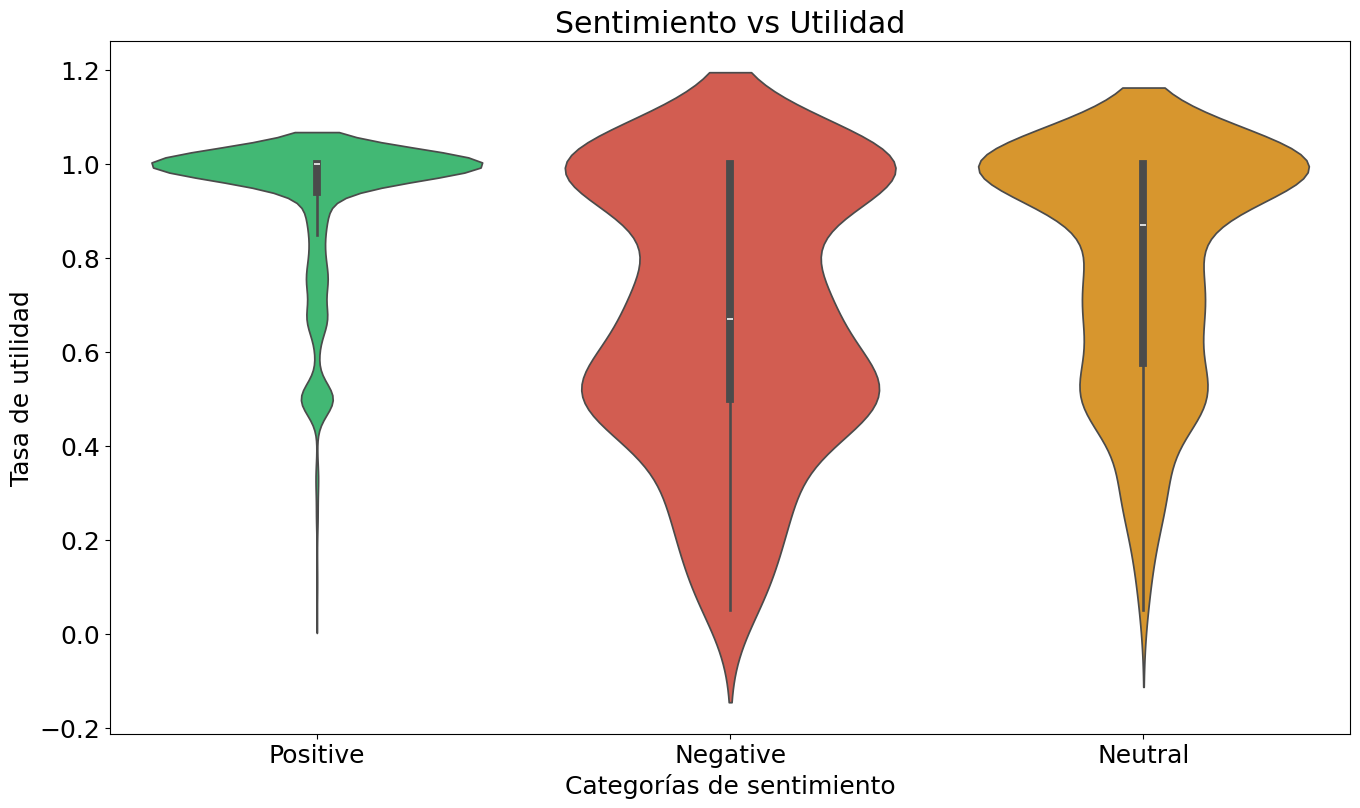

In [24]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Crear un dataframe con las columnas relevantes y eliminar registros con tasa de utilidad igual a cero
senti_help = pd.DataFrame(df, columns=['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00]

# Definir una paleta de colores personalizada para cada categoría de sentimiento
color_palette = {
    'Positive': '#2ecc71',  # Verde para positivo
    'Neutral': '#f39c12',   # Naranja para neutral
    'Negative': '#e74c3c'   # Rojo para negativo
}

# Crear el gráfico de violín manteniendo el estilo original pero con colores personalizados
sns.violinplot(
    x=senti_help["sentiment"],
    y=senti_help["helpful_rate"],
    palette=color_palette
)

# Mantener el estilo original de títulos y etiquetas
plt.title('Sentimiento vs Utilidad')
plt.xlabel('Categorías de sentimiento')
plt.ylabel('Tasa de utilidad')

plt.show()

A partir del gráfico se puede concluir que un mayor número de reseñas positivas tienen una alta tasa de utilidad. El valor medio resultó engañoso, siendo preferible, en situaciones como ésta, observar un gráfico en lugar de tomar algunas medidas de tendencia central.

## Sentimientos vs Años

En este bloque se observará cuántas reseñas se publicaron según el sentimiento en cada año desde 2004 hasta 2014.

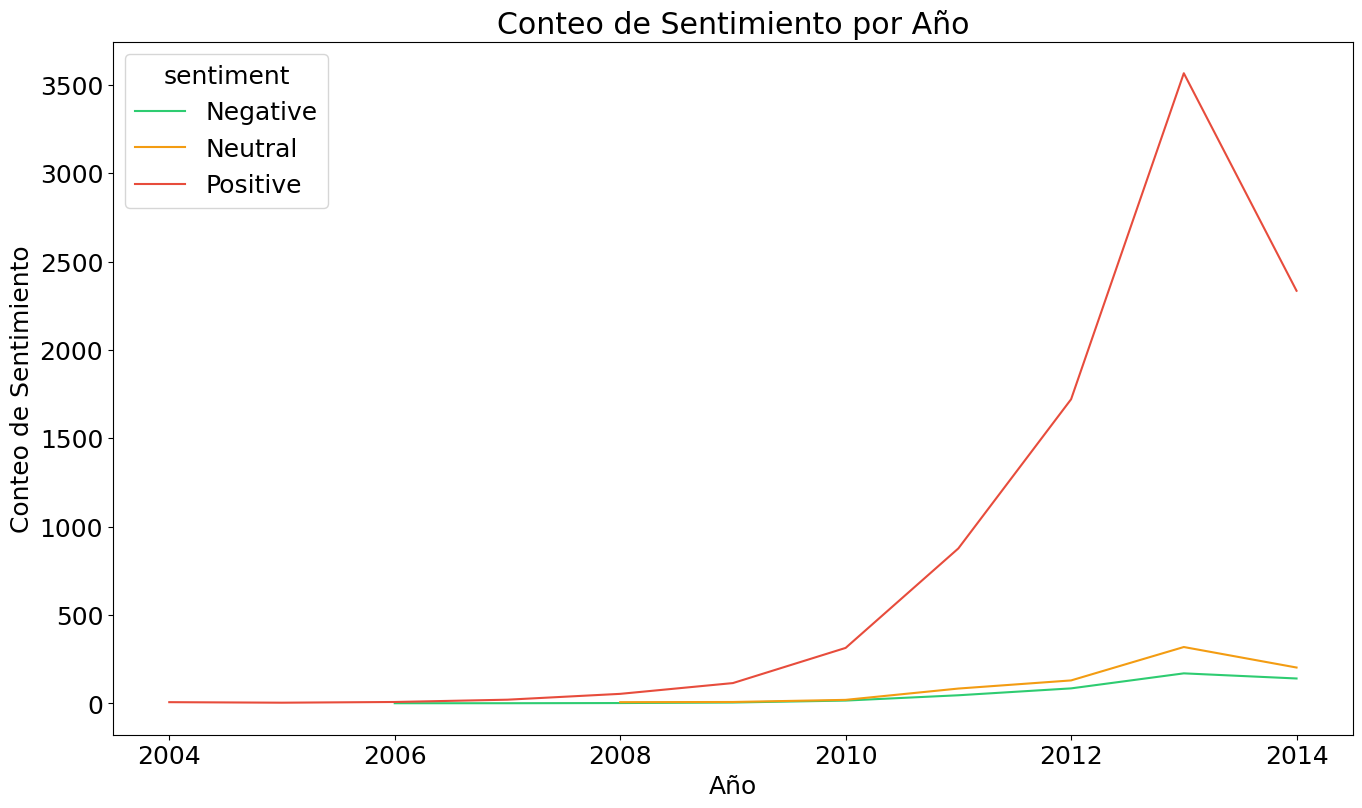

In [25]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Agrupar por año y sentimiento, contar y graficar
df.groupby(['year', 'sentiment'])['sentiment'].count().unstack().plot(
    legend=True,
    color=list(color_palette.values())
)

# Configurar el título y etiquetas
plt.title('Conteo de Sentimiento por Año')
plt.xlabel('Año')
plt.ylabel('Conteo de Sentimiento')

# Mostrar el gráfico
plt.show()

Del gráfico se puede observar claramente el aumento de las reseñas positivas a partir de 2010, alcanzando su pico alrededor de 2013 y registrándose una disminución en 2014. En este período, todas las tasas de reseñas experimentaron una caída en volumen. Las reseñas negativas y neutrales son muy bajas en comparación con las reseñas positivas.

## Día del mes vs Reseñas

Se procederá a verificar si existe alguna relación entre las reseñas y el día del mes.

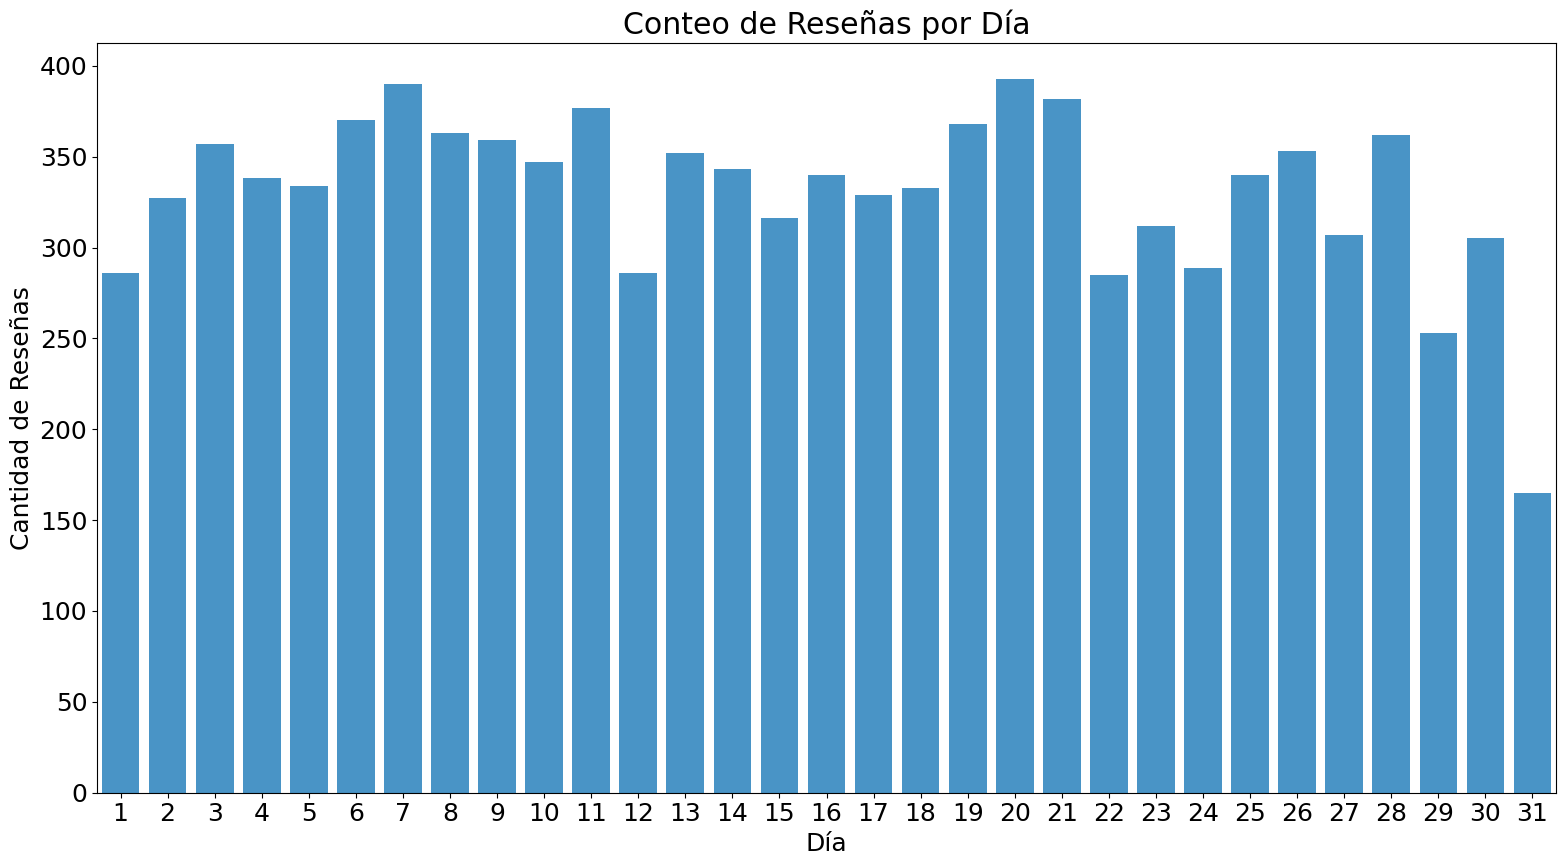

In [26]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Crear un dataframe con el conteo de reseñas por día
day = pd.DataFrame(df.groupby('day')['reviews'].count()).reset_index()
day['day'] = day['day'].astype('int64')
day = day.sort_values(by=['day'])  # Corregido: guardar el resultado del ordenamiento

# Definir un color atractivo para las barras
bar_color = '#3498db'  # Azul

# Crear el gráfico de barras con el color personalizado
plt.figure(figsize=(16, 9))
sns.barplot(x="day", y="reviews", data=day, color=bar_color)

# Configurar título y etiquetas
plt.title('Conteo de Reseñas por Día')
plt.xlabel('Día')
plt.ylabel('Cantidad de Reseñas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El recuento de reseñas está distribuido de manera más o menos uniforme. No existe mucha variación entre los días. Sin embargo, se observa una gran caída al final del mes.

## Análisis del texto de las reseñas

A continuación, se crearán algunas características más para el análisis de texto de la columna 'clean_reviews':

* **Polaridad**: Se utiliza Textblob para determinar la tasa de sentimiento. Se encuentra entre [-1, 1], donde -1 es polaridad negativa y 1 es polaridad positiva.

* **Longitud de la reseña**: Longitud de la reseña que incluye cada letra y espacio.

* **Recuento de palabras**: Mide cuántas palabras hay en la reseña.


In [27]:
# Calcular la polaridad del sentimiento usando TextBlob
df['polarity'] = df['clean_reviews'].map(lambda text: TextBlob(text).sentiment.polarity)

# Calcular la longitud de cada reseña (número de caracteres)
df['review_len'] = df['clean_reviews'].astype(str).apply(len)

# Calcular el conteo de palabras en cada reseña
df['word_count'] = df['clean_reviews'].apply(lambda x: len(str(x).split()))

# Mostrar las primeras filas para verificar los resultados
df.head()

reviewerID        asin  overall sentiment month day  year  \
0  A2IBPI20UZIR0U  1384719342      5.0  Positive    02  28  2014   
1  A14VAT5EAX3D9S  1384719342      5.0  Positive    03  16  2013   
2  A195EZSQDW3E21  1384719342      5.0  Positive    08  28  2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  Positive    02  14  2014   
4   A94QU4C90B1AX  1384719342      5.0  Positive    02  21  2014   

   helpful_votes  total_votes  helpful_rate  \
0              0            0          0.00   
1             13           14          0.93   
2              1            1          1.00   
3              0            0          0.00   
4              0            0          0.00   

                                             reviews  \
0  not much to write about here but it does exact...   
1  the product does exactly as it should and is q...   
2  the primary job of this device is to block the...   
3  nice windscreen protects my mxl mic and preven...   
4  this pop filter is great it looks and performs...   

                                       clean_reviews  polarity  review_len  \
0  much write exactly supposed filters pop sounds...  0.325000         154   
1  product exactly quite affordablei realized dou...  0.014286         347   
2  primary job device block breath would otherwis...  0.167500         309   
3  nice windscreen protects mxl mic prevents pops...  0.333333         169   
4  pop filter great looks performs like studio fi...  0.800000         128   

   word_count  
0          23  
1          53  
2          46  
3          22  
4          19

### Polaridad

A continuación, se examinará la distribución de la polaridad de la serie de textos de reseñas, donde se mide qué tan positivo o negativo son esos textos.

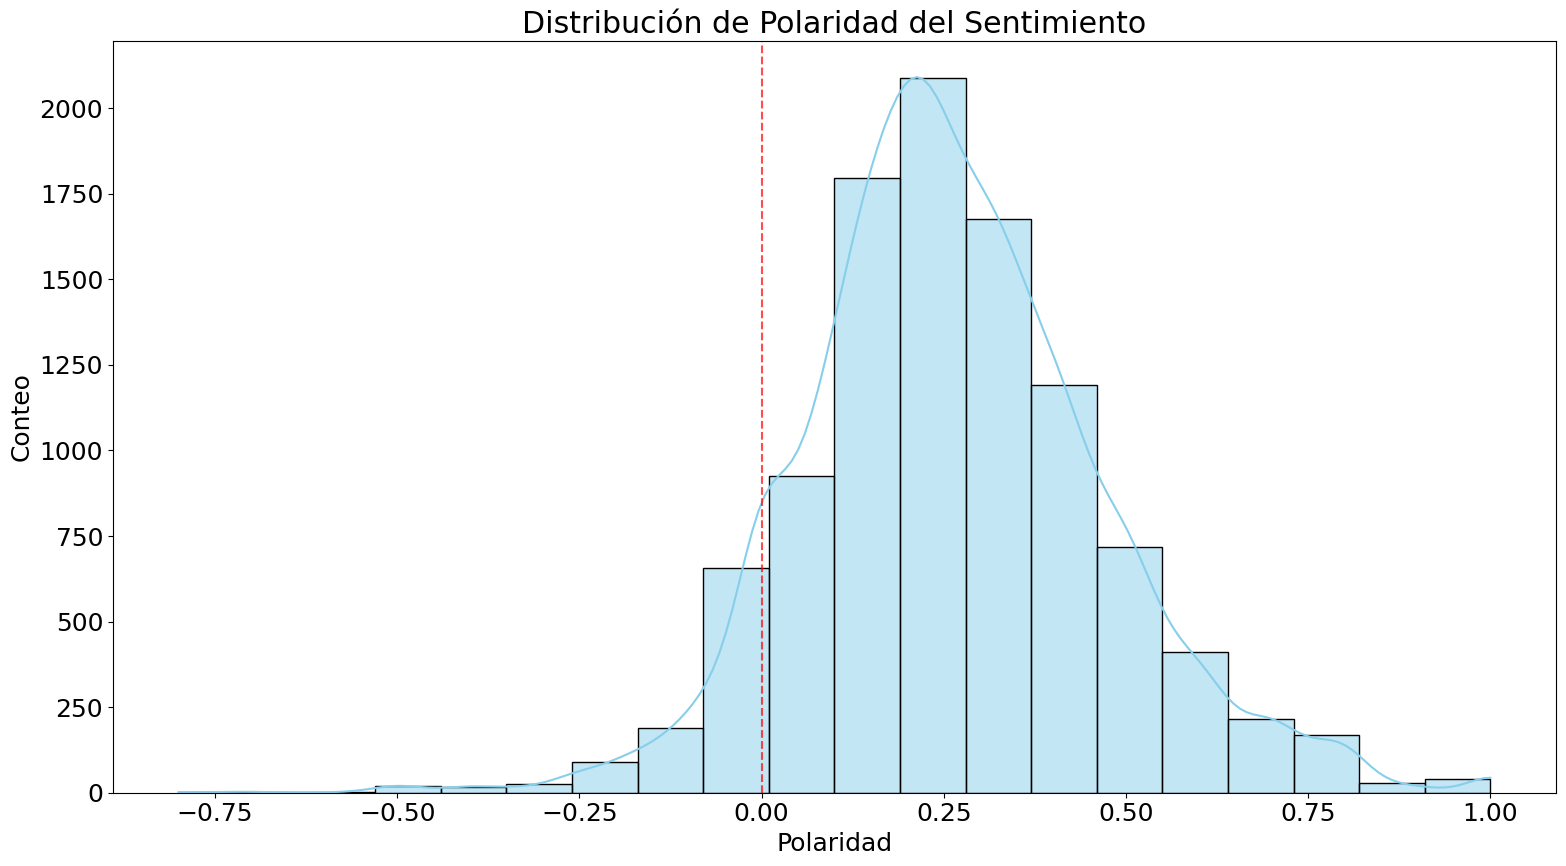

In [28]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Crear un histograma de la distribución de polaridad usando matplotlib/seaborn
plt.figure(figsize=(16, 9))
sns.histplot(
    df['polarity'],
    bins=20,
    kde=True,  # Añadir curva de densidad
    color='skyblue',
    edgecolor='black',
    linewidth=1
)

# Configurar el título y etiquetas
plt.title('Distribución de Polaridad del Sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Conteo')

# Añadir una línea vertical en polaridad = 0 para referencia
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se observa una gran cantidad de polaridades positivas en comparación con las polaridades negativas, con un sesgo hacia la positividad. La mayoría de los valores se concentran entre 0 y 0,5, con un pico alrededor de 0,25. Esto implica que la mayoría de las reseñas tienen una tendencia positiva, aunque no extremadamente positiva.  

La distribución no es completamente simétrica, pero tiene cierta forma de campana (distribución aproximadamente normal, aunque sesgada hacia la derecha). Esto puede reflejar que aunque hay variedad en las opiniones, las positivas dominan claramente.

Esta distribución de polaridad confirma la cantidad de reseñas positivas que teníamos y que los usuarios están mayormente satisfechos con los productos comprados.

### Longitud del texto de la reseña

A continuación, se examinará la longitud del texto de la reseña, es decir, cuántos caracteres tiene cada reseña y con qué frecuencia se presentan ciertas longitudes.

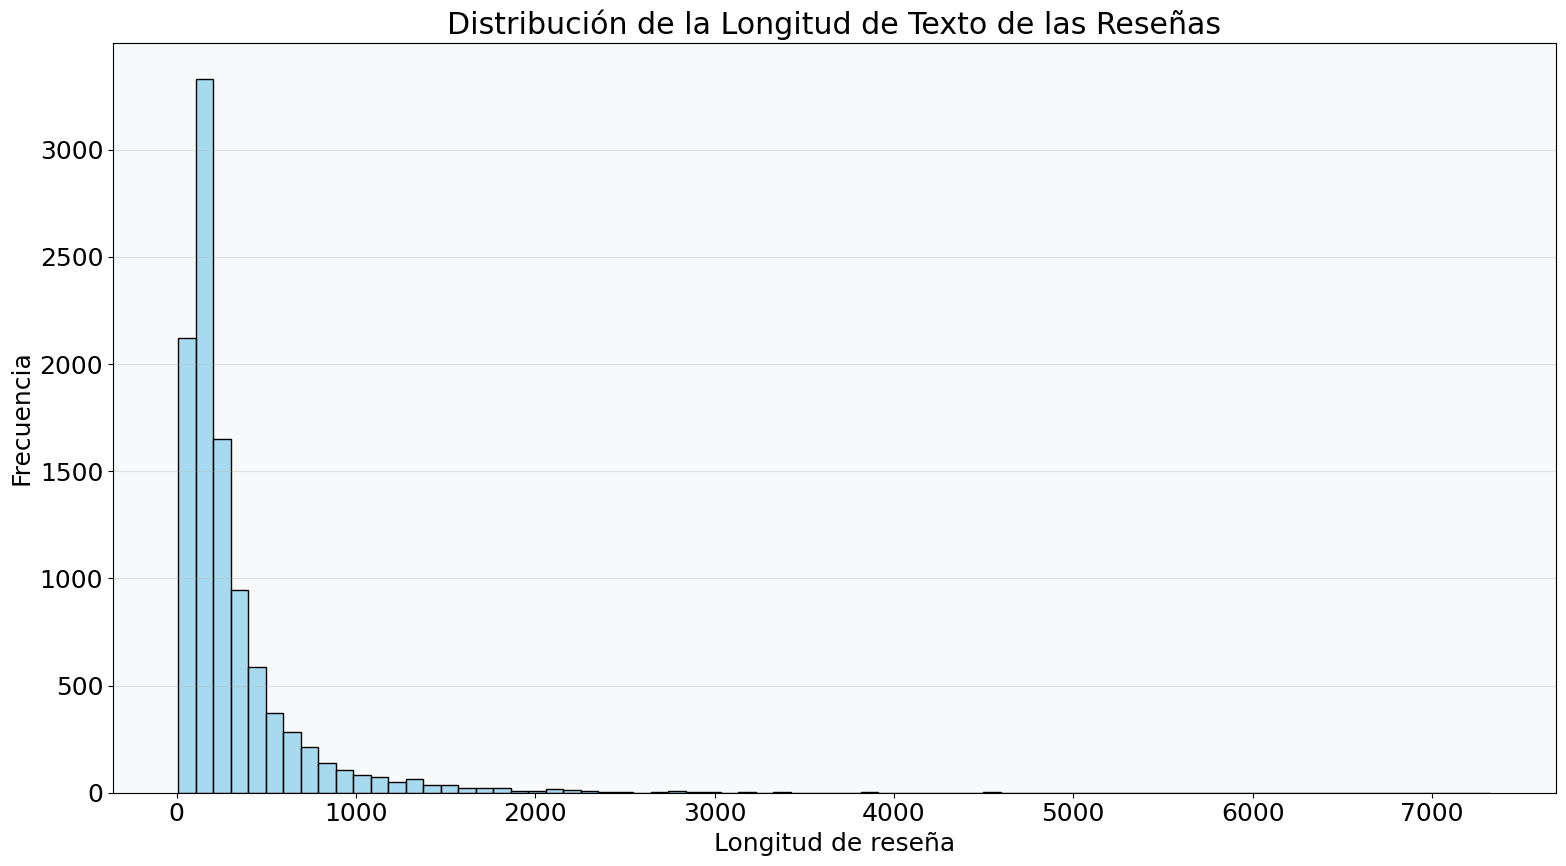

In [29]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Crear histograma con matplotlib/seaborn
plt.figure(figsize=(16, 9))
sns.histplot(
    df['review_len'],
    bins=75,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Personalizar el gráfico
plt.title('Distribución de la Longitud de Texto de las Reseñas')
plt.xlabel('Longitud de reseña')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)

# Mejorar legibilidad con un fondo claro
plt.gca().set_facecolor('#f8f9fa')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El valor más frecuente (la moda) está en la segunda barra, entre 100 y 200, lo que sugiere que muchas reseñas son muy concisas.

Aunque la mayoría de los textos se concentran por debajo de los 1000 caracteres, hay algunos que llegan incluso hasta más de 7000 (larga cola derecha), lo cual puede ser considerado atípico.


### Cantidad de palabras del texto de la reseña


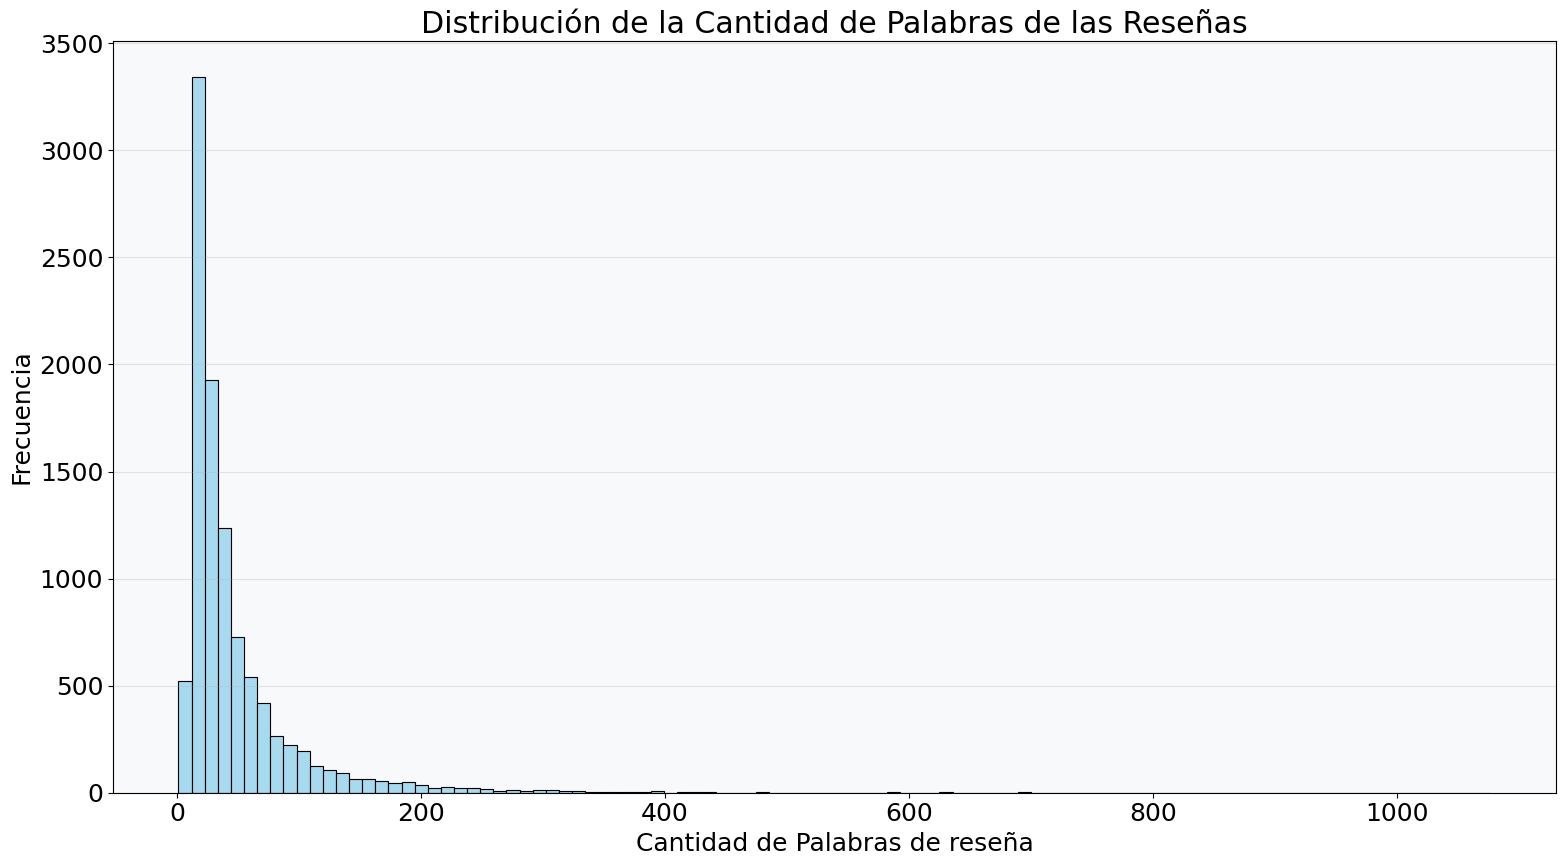

In [30]:
# Configuración del tamaño de la visualización
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 16, 9

# Crear histograma con matplotlib/seaborn
plt.figure(figsize=(16, 9))
sns.histplot(
    df['word_count'],
    bins=100,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Personalizar el gráfico
plt.title('Distribución de la Cantidad de Palabras de las Reseñas')
plt.xlabel('Cantidad de Palabras de reseña')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)

# Mejorar legibilidad con un fondo claro
plt.gca().set_facecolor('#f8f9fa')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La cantidad de palabras de una reseña más frecuente (la moda) está en el primer intervalo, lo que sugiere que las reseñas en general no superan las 200 palabras.
A pesar de que la mayoría de los textos se agrupan por debajo de las 200 palabras, algunas reseñas presentan hasta más de 600 palabras (larga cola derecha), lo cual puede ser considerado atípico.

## Análisis de palabras de las reseñas

### Palabras más frecuente según sentimiento

A continuación, se representarán gráficamente las palabras más frecuentes en las reseñas, basándose en el sentimiento.

<Figure size 1600x2400 with 0 Axes>

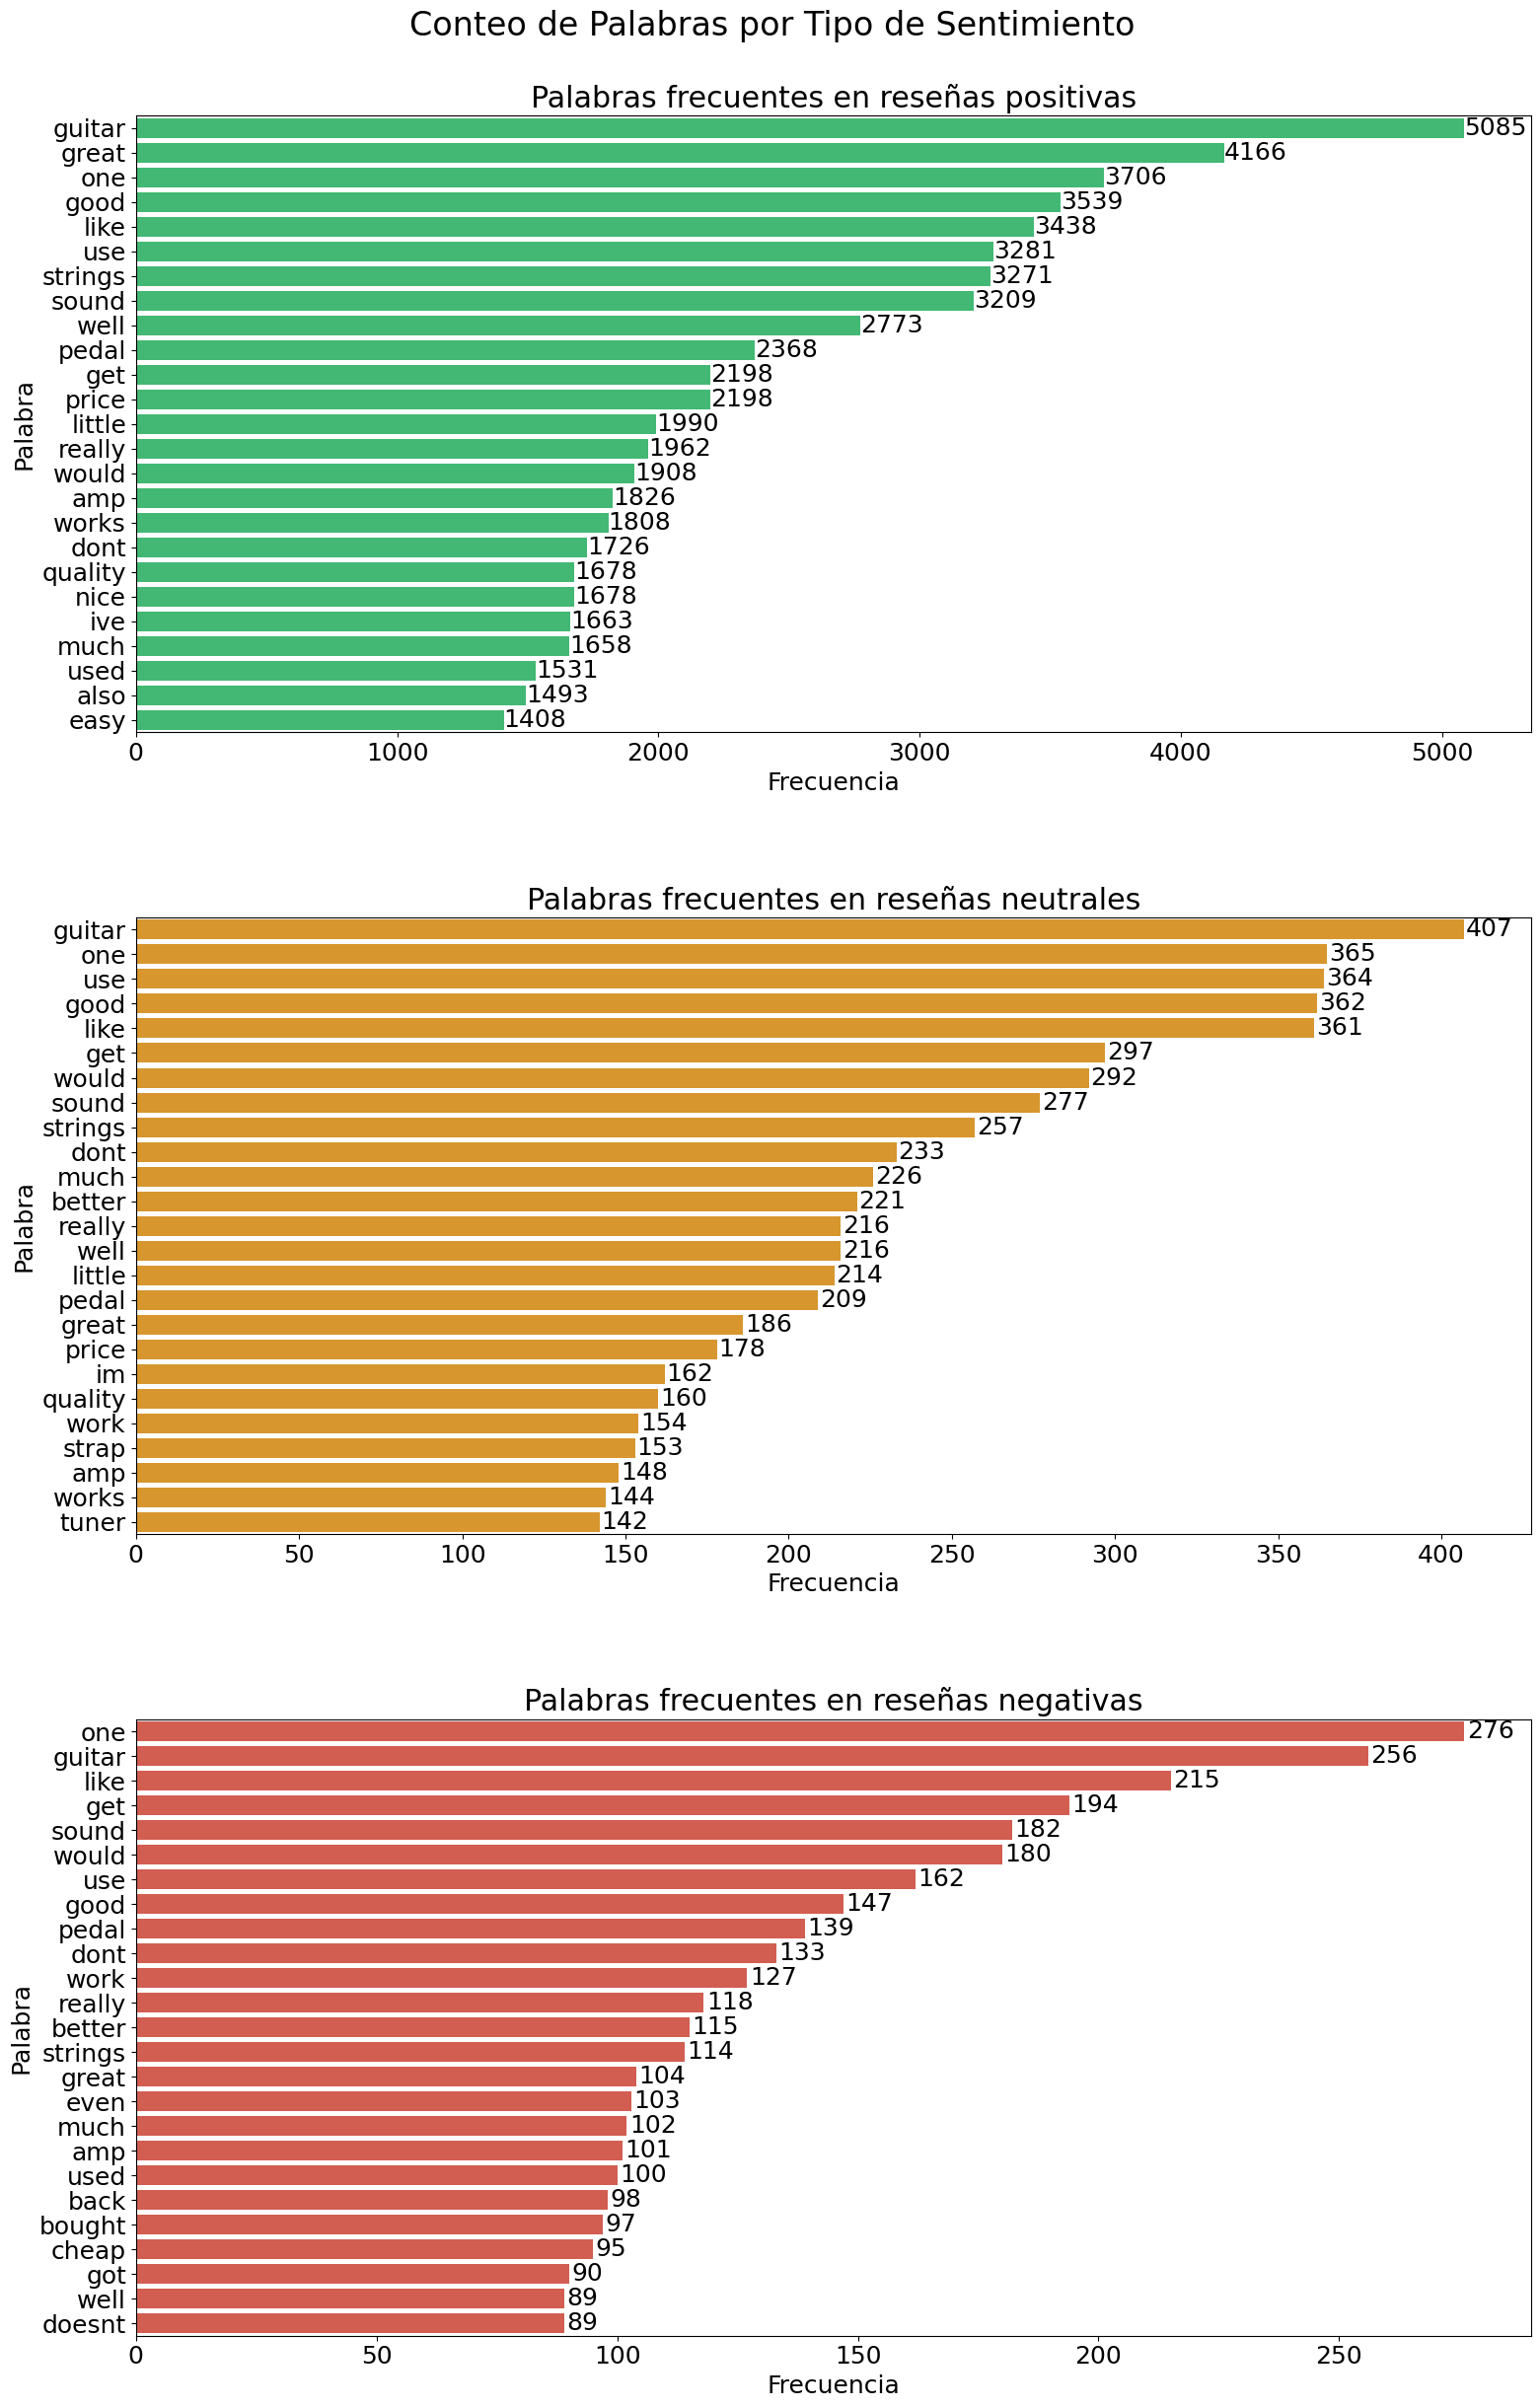

In [32]:
# Definir colores para cada categoría de sentimiento
color_positive = '#2ecc71'  # Verde para positivo
color_neutral = '#f39c12'   # Naranja para neutral
color_negative = '#e74c3c'  # Rojo para negativo

# Filtrar datos por tipo de sentimiento
review_pos = df[df["sentiment"] == 'Positive'].dropna()
review_neu = df[df["sentiment"] == 'Neutral'].dropna()
review_neg = df[df["sentiment"] == 'Negative'].dropna()

# Función para generar n-gramas
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in english_stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Función para crear gráfico de barras horizontales
def plot_horizontal_bar(ax, data, title, color):
    # Usar directamente el parámetro color en lugar de palette
    sns.barplot(x="wordcount", y="word", data=data, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Palabra')

    # Añadir valores al final de cada barra
    for i, v in enumerate(data["wordcount"]):
        ax.text(v + 0.5, i, str(v), va='center')

# Crear la figura principal primero (corrección del error de figura vacía)
plt.figure(figsize=(16, 24))
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Palabras frecuentes en reseñas positivas
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[0], fd_sorted.head(25), "Palabras frecuentes en reseñas positivas", color_positive)

# Palabras frecuentes en reseñas neutrales
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[1], fd_sorted.head(25), "Palabras frecuentes en reseñas neutrales", color_neutral)

# Palabras frecuentes en reseñas negativas
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[2], fd_sorted.head(25), "Palabras frecuentes en reseñas negativas", color_negative)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Conteo de Palabras por Tipo de Sentimiento", fontsize=24, y=1.02)
plt.show()

Como se observa, las palabras no coinciden con el sentimiento, excepto algunas. A través de los monogramas no se puede juzgar un sentimiento basándose en una sola palabra. Por lo tanto, se intentará con las dos palabras más frecuentes.

### Pares de palabras más frecuentes según sentimiento

A continuación, se representarán gráficamente los pares de palabras más frecuentes en las reseñas, basándose en el sentimiento.

<Figure size 1600x2400 with 0 Axes>

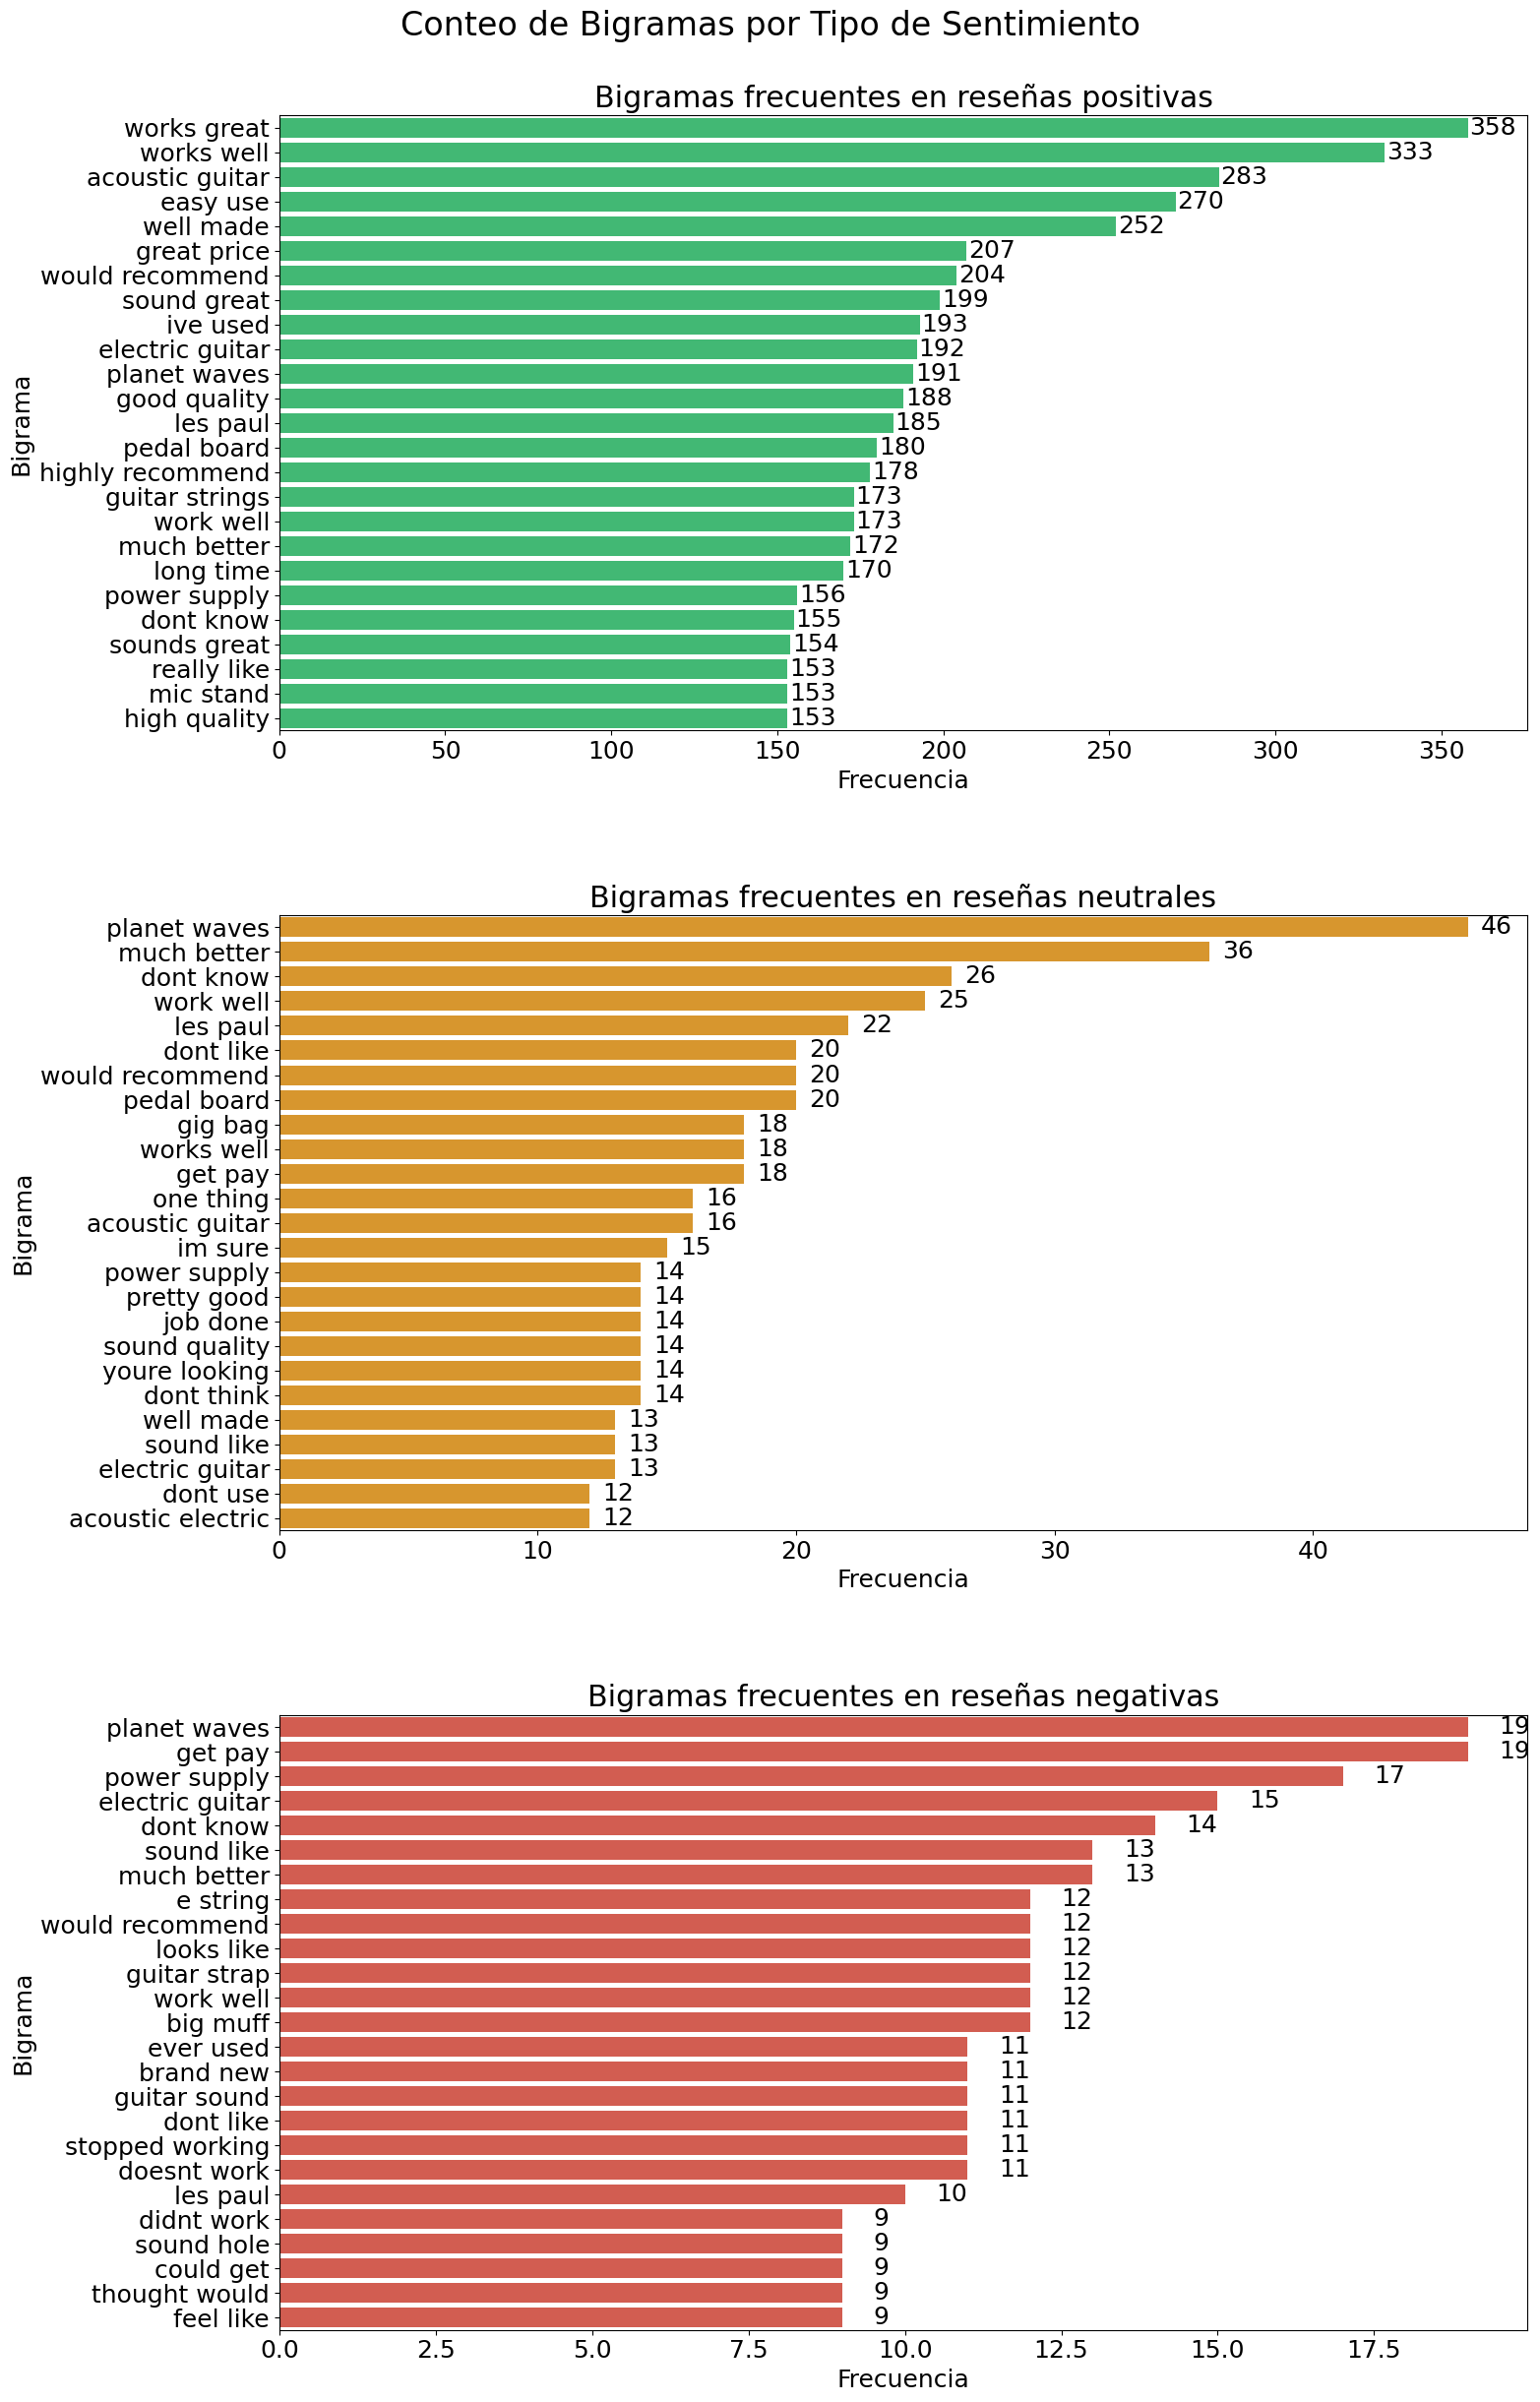

In [33]:
# Función para generar n-gramas
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(" ")
             if token != ""
             if token not in english_stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Función para crear gráfico de barras horizontales
def plot_horizontal_bar(ax, data, title, color):
    # Usar directamente el parámetro color en lugar de palette
    sns.barplot(x="wordcount", y="word", data=data, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Bigrama')

    # Añadir valores al final de cada barra
    for i, v in enumerate(data["wordcount"]):
        ax.text(v + 0.5, i, str(v), va='center')

# Crear la figura principal
plt.figure(figsize=(16, 24))
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Bigramas frecuentes en reseñas positivas
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent, 2):  # Usamos n_gram=2 para bigramas
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[0], fd_sorted.head(25), "Bigramas frecuentes en reseñas positivas", color_positive)

# Bigramas frecuentes en reseñas neutrales
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent, 2):  # Usamos n_gram=2 para bigramas
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[1], fd_sorted.head(25), "Bigramas frecuentes en reseñas neutrales", color_neutral)

# Bigramas frecuentes en reseñas negativas
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent, 2):  # Usamos n_gram=2 para bigramas
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[2], fd_sorted.head(25), "Bigramas frecuentes en reseñas negativas", color_negative)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Conteo de Bigramas por Tipo de Sentimiento", fontsize=24, y=1.02)
plt.show()


A partir de los gráficos de bigramas frecuentes en reseñas positivas, neutras y negativas, se pueden obtener varias conclusiones relevantes sobre cómo varía el lenguaje utilizado según el tipo de sentimiento expresado por los usuarios.

---


🟢 **Reseñas positivas**

* Bigramas dominantes: “works great”, “works well”, “easy use”, “great price”, “would recommend”.

* Patrones de satisfacción: Se destacan expresiones que indican funcionamiento eficiente, buena relación calidad-precio y recomendaciones. Esto sugiere una experiencia muy positiva con el producto.

* Relevancia del producto: Aparecen bigramas como “acoustic guitar”, “electric guitar”, lo cual refuerza que las reseñas se enfocan en instrumentos musicales específicos.

Se concluye que los usuarios satisfechos tienden a utilizar lenguaje enfático y directo para expresar su agrado y recomendar el producto.


---

🟠 **Reseñas neutras**

* Bigramas comunes: “planet waves”, “much better”, “dont know”, “get pay”, “one thing”, “im sure”.

* Lenguaje ambiguo o descriptivo: Frases como “dont know”, “im sure” o “one thing” reflejan incertidumbre o evaluación mixta.

* Términos técnicos: También hay uso de términos como “acoustic guitar”, “power supply”, lo cual puede indicar reseñas más técnicas o informativas.

Se deduce que el lenguaje en reseñas neutras es menos emocional y más analítico o vago, sin expresar claramente satisfacción o insatisfacción.

---

🔴 **Reseñas negativas**

* Bigramas negativos: “dont like”, “doesnt work”, “stopped working”, “didnt work”, “thought would”.

* Enfocados en fallas: Hay un énfasis claro en mal funcionamiento, expectativas no cumplidas y descripciones de problemas técnicos.

* Aparición de marcas o partes específicas: “planet waves”, “guitar strap”, lo que indica que incluso los comentarios negativos son detallados y dirigidos a productos específicos.

Resulta evidente que el lenguaje en reseñas negativas se caracteriza por ser explícitamente crítico, enfocado en desempeño deficiente o decepción.



### Trigrama de palabras más frecuentes según sentimiento

A continuación, se representarán gráficamente los conjuntos de tres palabras (trigramas) más frecuentes en las reseñas, basándose en el sentimiento.

<Figure size 1600x2400 with 0 Axes>

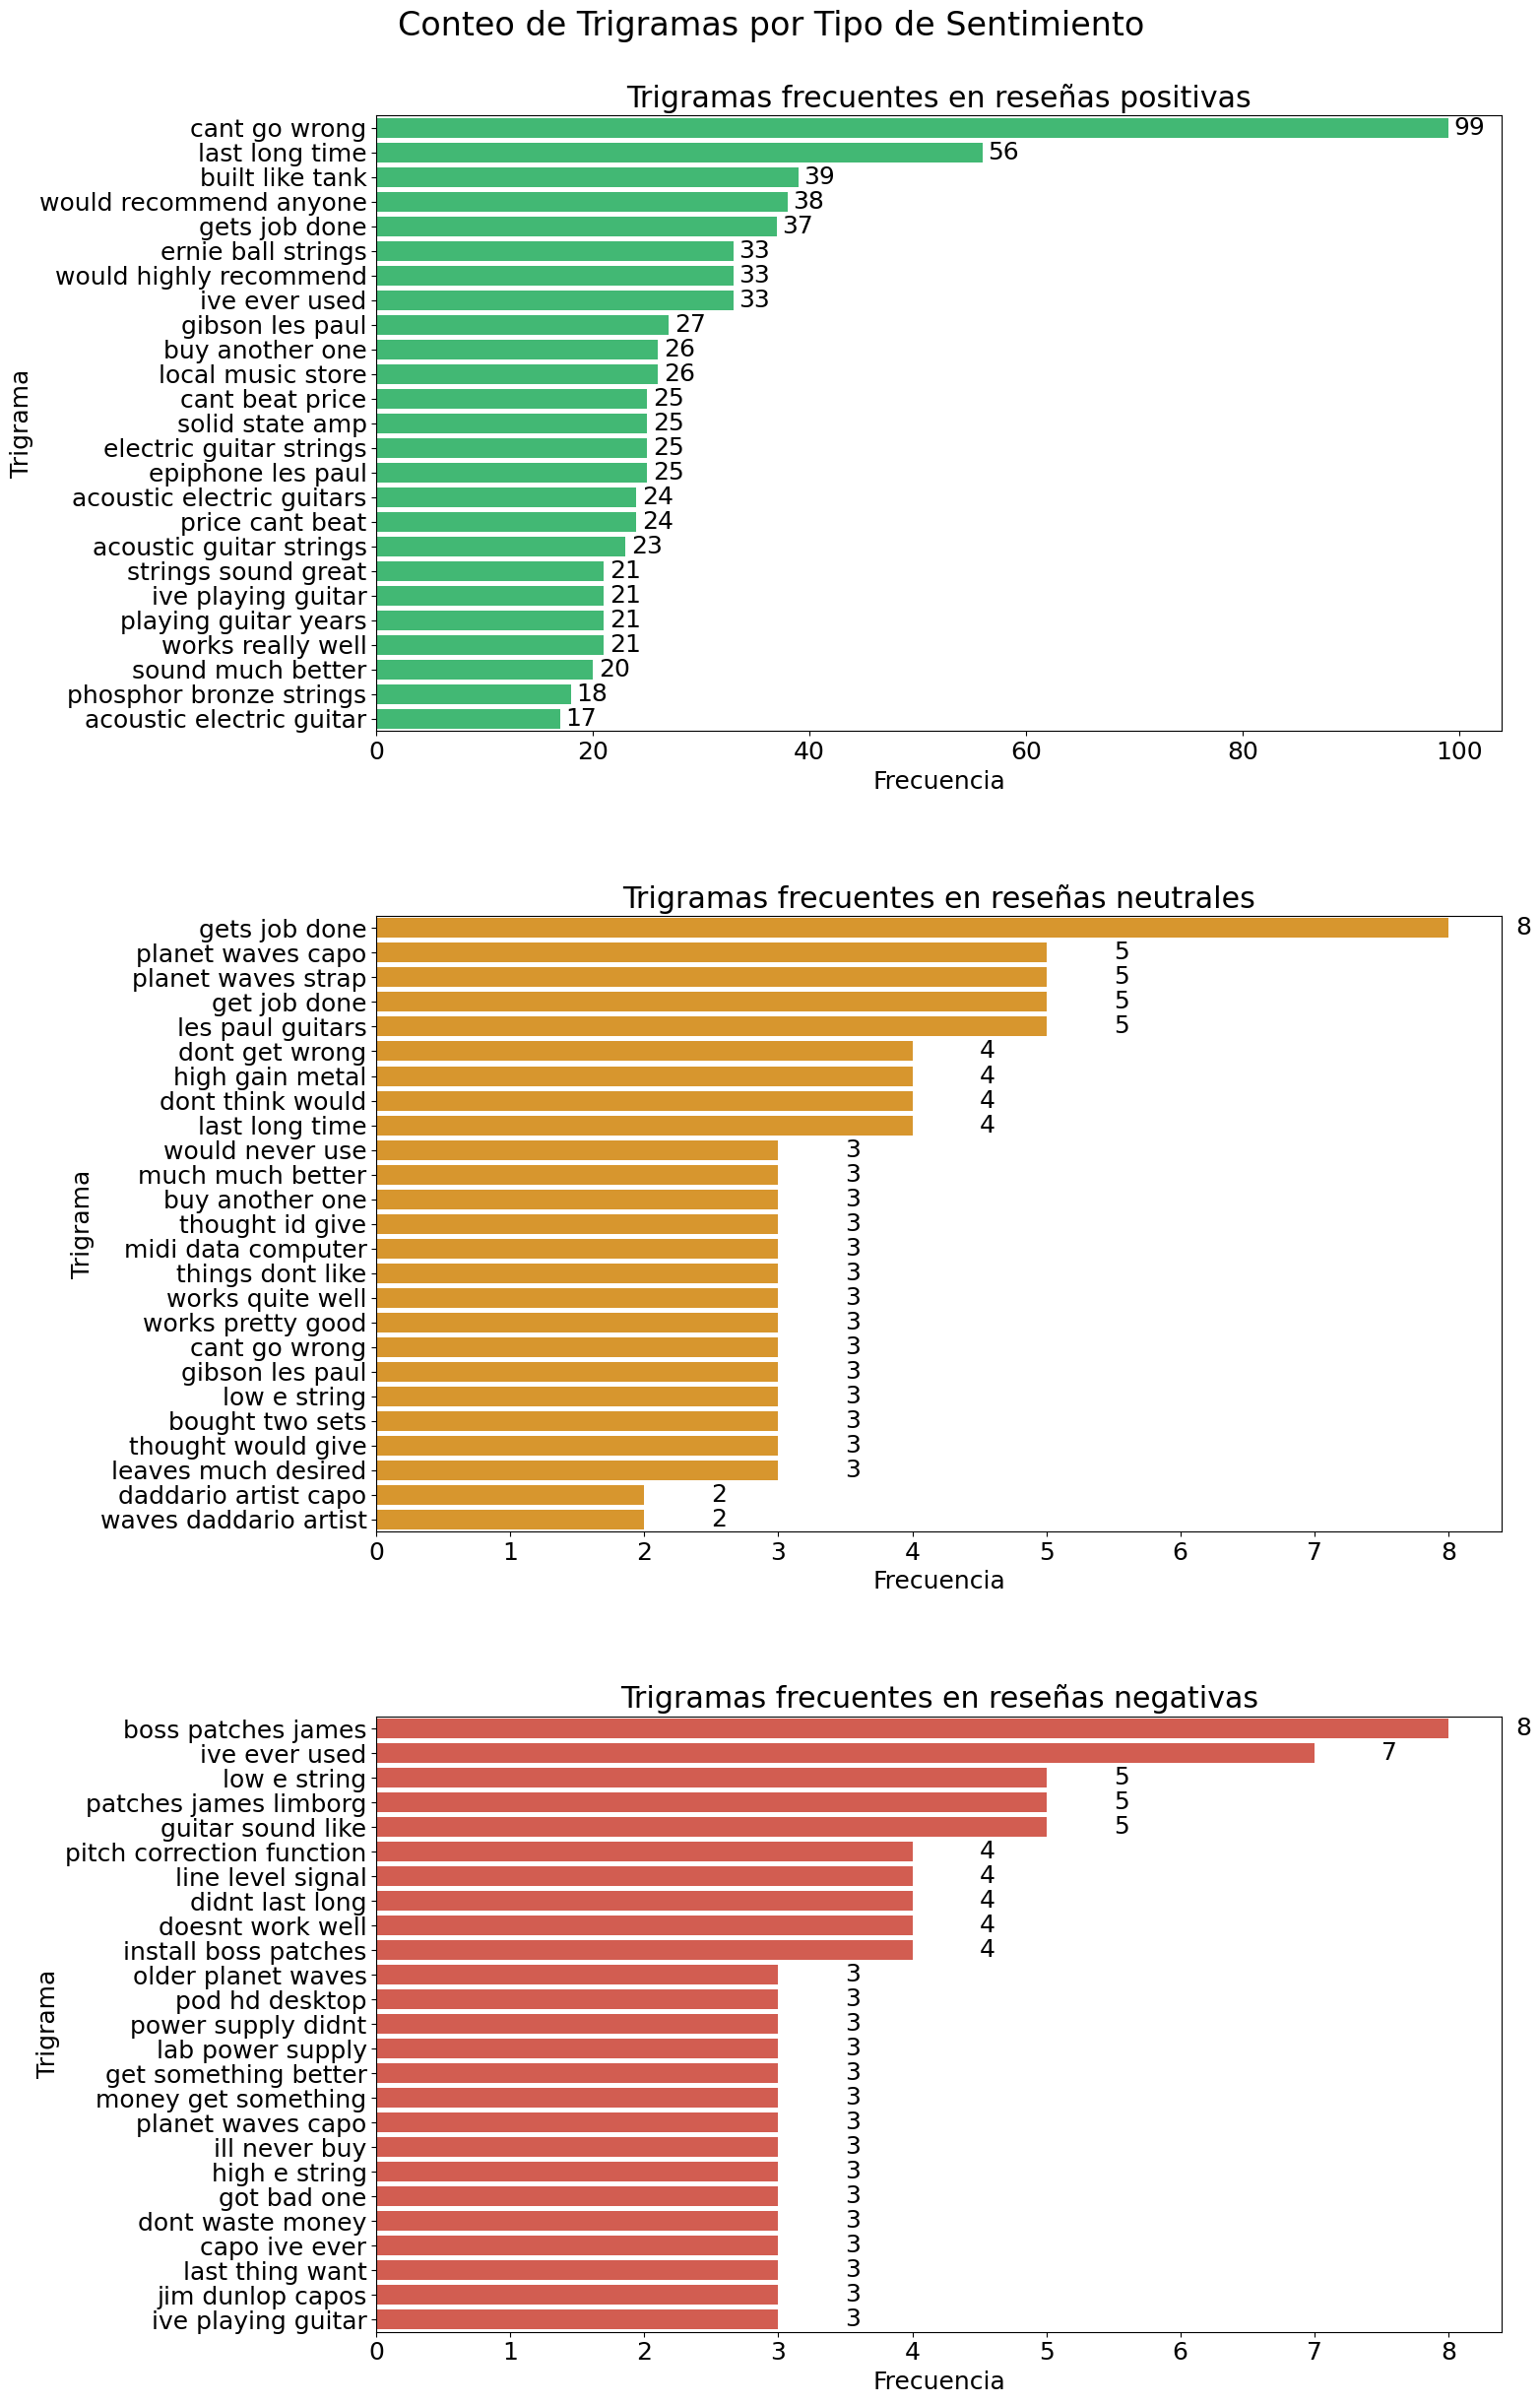

In [34]:
# Función para generar trigramas
def generate_ngrams(text, n_gram=3):
    token = [token for token in text.lower().split(" ")
             if token != ""
             if token not in english_stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Función para crear gráfico de barras horizontales
def plot_horizontal_bar(ax, data, title, color):
    sns.barplot(x="wordcount", y="word", data=data, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Trigrama')

    for i, v in enumerate(data["wordcount"]):
        ax.text(v + 0.5, i, str(v), va='center')

# Crear la figura principal
plt.figure(figsize=(16, 24))
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Trigramas frecuentes en reseñas positivas
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent, 3):  # <--- Trigrama
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[0], fd_sorted.head(25), "Trigramas frecuentes en reseñas positivas", color_positive)

# Trigramas frecuentes en reseñas neutrales
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent, 3):  # <--- Trigrama
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[1], fd_sorted.head(25), "Trigramas frecuentes en reseñas neutrales", color_neutral)

# Trigramas frecuentes en reseñas negativas
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent, 3):  # <--- Trigrama
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plot_horizontal_bar(axes[2], fd_sorted.head(25), "Trigramas frecuentes en reseñas negativas", color_negative)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Conteo de Trigramas por Tipo de Sentimiento", fontsize=24, y=1.02)
plt.show()


Basándose en la visualización de los trigramas más comunes en las reseñas clasificadas como positivas, neutrales y negativas, se pueden identificar diversas observaciones relevantes acerca del lenguaje utilizado, la apreciación de los productos y los aspectos que los usuarios destacan en función del sentimiento manifestado.

---


🟢 **Reseñas positivas**

Trigramas dominantes: “cant go wrong”, “last long time”, “would recommend anyone”, “ernie ball strings”, “gibson les paul”, “solid state amp”.

Conclusiones:
 - Confianza y satisfacción: Frases como “can’t go wrong” y “would recommend anyone” reflejan un nivel alto de confianza y satisfacción del cliente.
 - Durabilidad: La expresión “last long time” indica que la durabilidad es un aspecto valorado en productos bien evaluados.
 - Marcas específicas: Nombres como “Gibson Les Paul”, “Ernie Ball Strings” y “Solid State Amp” muestran que ciertas marcas o productos específicos están muy asociados con experiencias positivas.
 - Utilidad comprobada: Frases como “gets job done” y “works really well” refuerzan que los productos cumplen su función de forma efectiva.


---

🟠 **Reseñas neutras**

Trigramas destacadas: “gets job done”, “planet waves capo”, “planet waves strap”, “dont think would”, “would never use”, “thought id give”.

Conclusiones:
 - Lenguaje mixto o limitado: Muchas frases en reseñas neutrales tienden a ser ambiguas, con un tono que puede ser tanto positivo como negativo dependiendo del contexto, como “gets job done” o “works pretty good”.
 - Exploración y dudas: Trigramas como “thought I'd give” o “would never use” sugieren cierta experimentación o reservas.
 - Enfoque en marcas específicas: La mención frecuente de Planet Waves indica que los productos de esa marca generan una variedad de opiniones, no necesariamente negativas.


---

🔴 **Reseñas negativas**

Trigramas frecuentes: “doesnt work well”, “didnt last long”, “get something better”, “dont waste money”, “got bad one”, “ill never buy”, “boss patches james”, “low e string”, “lab power supply”.

Conclusiones:
 - Fallos funcionales y decepción: Frases como “doesn't work well”, “didn't last long”, y “get something better” son claras señales de insatisfacción funcional o de baja calidad percibida.
 - Advertencias a otros usuarios: Trigramas como “don’t waste money” y “I’ll never buy” reflejan experiencias negativas severas, con intención de advertir a otros compradores.
 - Problemas específicos: Se destacan referencias a elementos técnicos específicos como “pitch correction function”, “low E string”, “lab power supply”, lo que sugiere que los fallos técnicos concretos tienen un fuerte impacto en la percepción negativa.


### Wordcloud

Se visualizará en un gráfico Wordcloud las palabras que más frecuencia tienen en las reseñas, independientemente del sentimiento que acompañan.

In [35]:
def generate_wordcloud(df, text_column='clean_reviews', figsize=(12, 8)):

    # Combinar todos los textos en uno solo
    word_cloud_text = ' '.join(df[text_column].astype(str).tolist())

    # Crear la nube de palabras
    wordcloud = WordCloud(
        width=1500,
        height=1000,
        background_color='white',
        max_words=200,
        contour_width=3,
        contour_color='steelblue'
    ).generate(word_cloud_text)

    # Mostrar la nube de palabras
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.title('Nube de Palabras de Reseñas', fontsize=20)

    return fig

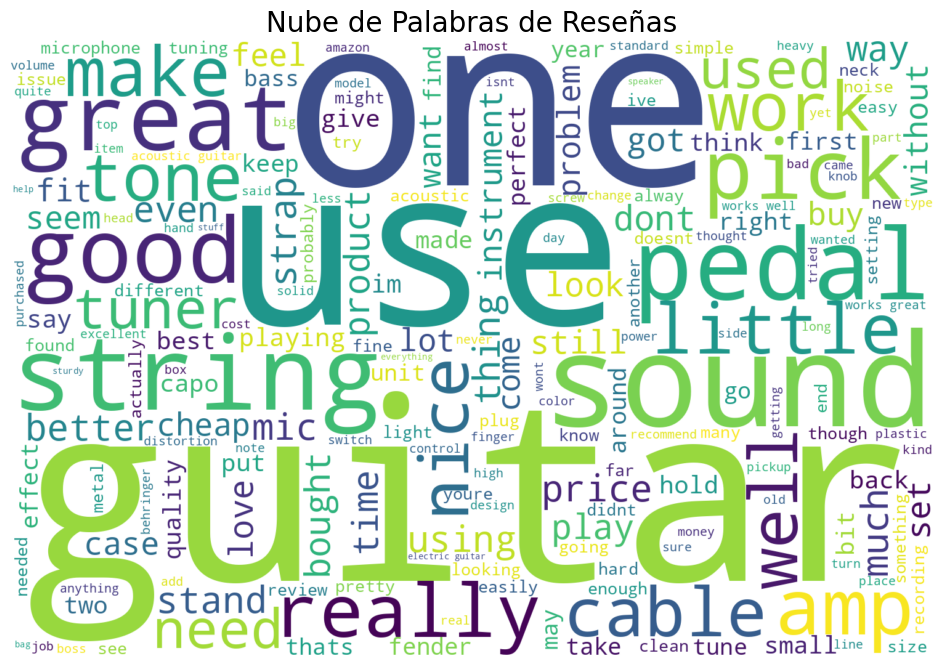

In [36]:
# Para una única nube de palabras de todas tus reseñas
fig = generate_wordcloud(df)
plt.show()

En la nube de palabras, podemos ver que las más utilizadas presentan mayor tamaño, entre las primeras que podemos mencionar encontramos: guitar, one, use, sound, string, good, great, pedal, etc.

### Wordcloud filtrado por sentimiento Positivo

A continuación, se examinará la nube de palabras de las reseñas positivas.

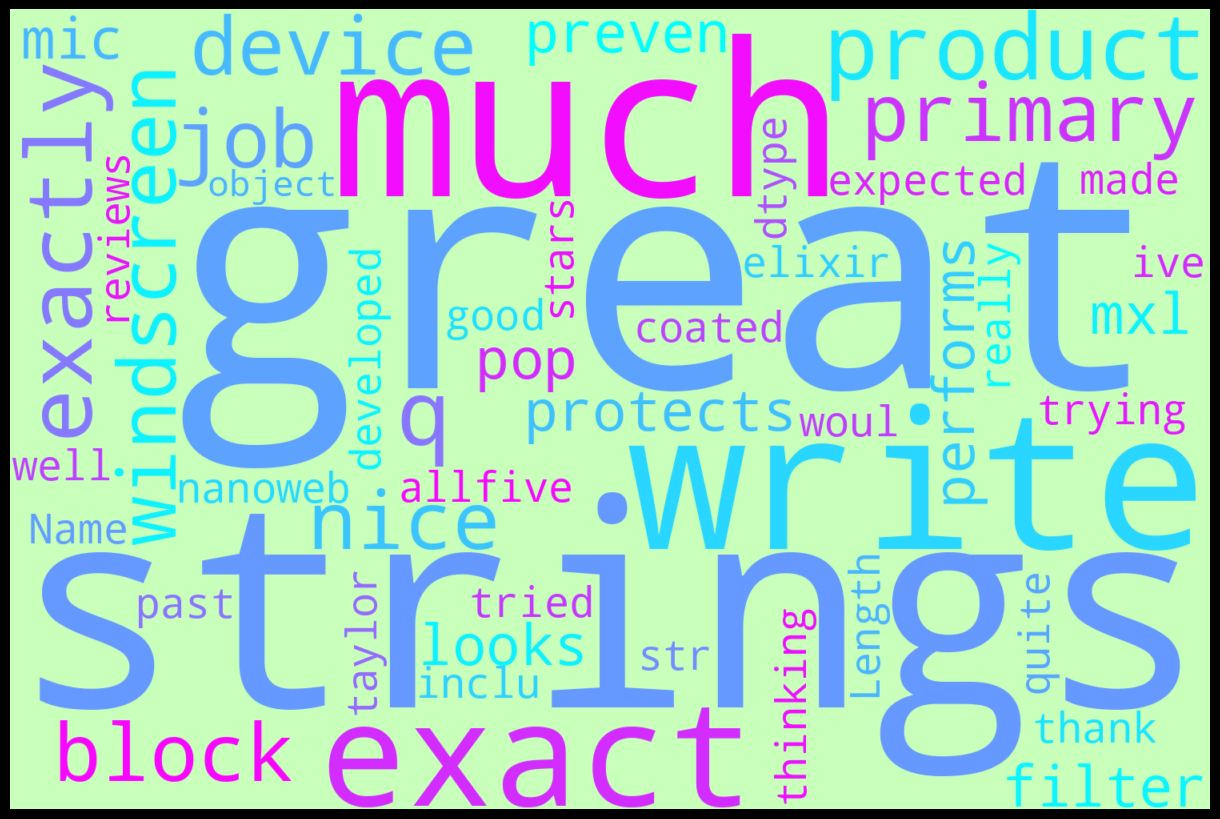

In [37]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='#C8FFBA',
    max_words=200,
    contour_width=3,
    contour_color='steelblue',
    colormap='cool',
    stopwords = english_stopwords).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Se pueden observar palabras positivas como great, affordable, expected, exactly, well, good, nice, etc.

### Wordcloud filtrado por sentimiento Neutro

A continuación, se examinará la nube de palabras de las reseñas neutras.

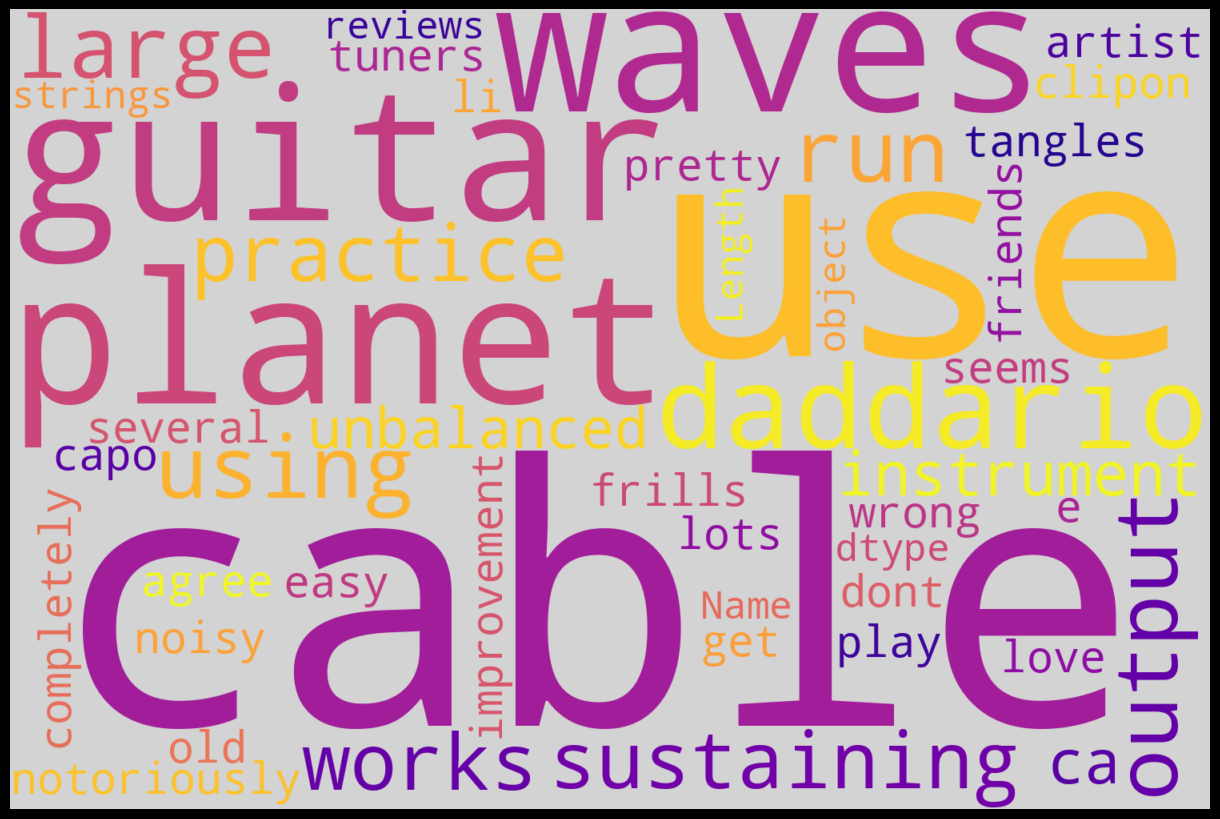

In [38]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='#d3d3d3',
    max_words=200,
    contour_width=3,
    contour_color='steelblue',
    colormap='plasma',
    stopwords = english_stopwords).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

La mayoría de las palabras de las reseñas neutrales se centran en los productos y en cómo podrían mejorarse. Además, empiezan a aparecer palabras negativas como noisy, unbalanced o wrong entre las positivas como improvement, pretty,
agree o easy.

### Wordcloud filtrado por sentimiento Negativo

A continuación, se examinará la nube de palabras de las reseñas negativas.

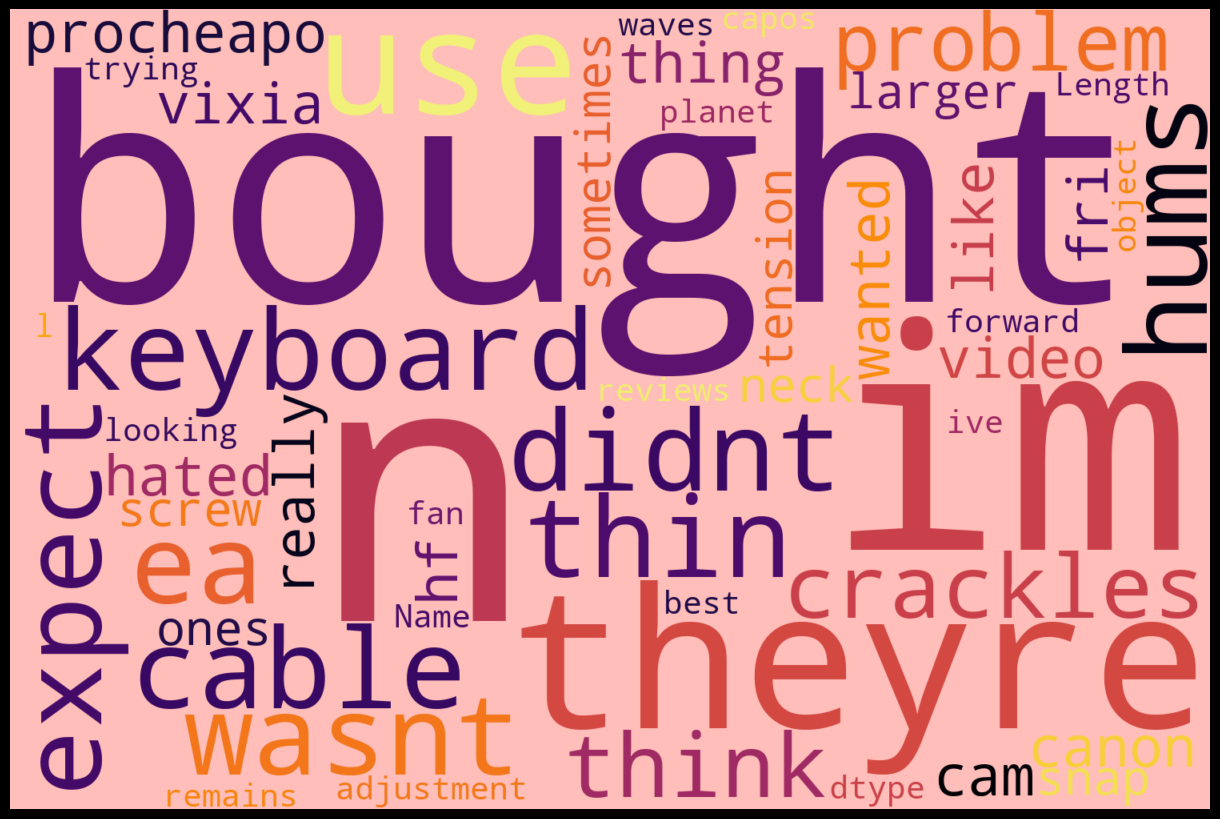

In [39]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='#FFBEB9',
    max_words=200,
    contour_width=3,
    contour_color='steelblue',
    colormap='inferno',
    stopwords = english_stopwords).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Se pueden observar palabras de reseñas negativas como didnt, hated, wasnt, problem, tension, etc.

### **Conclusiones Generales del Análisis de palabras**



Los trigramas permiten identificar patrones más precisos que los wordclouds, unigramas o bigramas, revelando frases hechas, recomendaciones directas o quejas específicas.

Los sentimientos positivos se relacionan con durabilidad, confianza, y recomendaciones, mientras que los negativos giran en torno a fallos técnicos, decepción y advertencias.

Las menciones de marcas o modelos (como Gibson, Ernie Ball, Planet Waves) ayudan a detectar productos clave que polarizan opiniones.

El vocabulario en reseñas neutrales es más difuso o reservado, con menor intensidad emocional y muchas veces descriptivo o exploratorio.

# **Extracción de la Característica Sentimiento**

Antes de construir el modelo para nuestro análisis de sentimiento, se requiere convertir los textos de las reseñas a una representación vectorial, ya que las computadoras no pueden comprender las palabras y su sentimiento. En este proyecto, se utilizará el método TF-IDF para convertir los textos.

## Codificación de la variable objetivo - Sentimiento


A continuación, se codificará nuestra variable objetivo con Label Encoder.

In [40]:
# llamar a la función de codificación de etiquetas
label_encoder = preprocessing.LabelEncoder()

# Codificar etiquetas en la columna 'sentiment'.
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()

array([2, 1, 0])

## Distribución de la característica Sentimiento

In [41]:
df['sentiment'].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

A simple vista, se puede determinar que hay una distribución desigual de sentimientos. Existen muchas reseñas positivas (2) y pocas tanto neutras (1) como negativas (0).

Esto es un problema porque los modelos tienden a sesgarse hacia la clase mayoritaria.

## Aplicando Stemming a las reseñas

El Stemming es un método para obtener la raíz de una palabra a partir de su forma flexionada. A continuación, se extraen las reseñas limpias 'clean_reviews' y se convierten las palabras de las reseñas a su raíz.

Por ejemplo:

*   "recordings" → "record"
*   "filters" → "filter"
*   "allowing" → "allow"
*   "positioned" → "posit"


Como se puede observar, las raíces obtenidas no necesariamente conservan un significado semántico completo. Existe otra técnica conocida como Lemmatización, que convierte las palabras a su raíz léxica, la cual sí tiene un significado semántico. Dado que esta última requiere un análisis lingüístico más profundo (consulta de diccionarios, comprensión de la morfología de las palabras) y en efecto, más tiempo de procesamiento, se utilizará Stemming en este caso.

In [42]:
# Se crea un corpus
corpus = df['clean_reviews'].tolist()

In [43]:
corpus[0:5]

['much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricinggood',
 'product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product jake',
 'primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put itit job well',
 'nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagginggood windscreen money',
 

In [44]:
# Se aplica el stemming al corpus

# Crear el stemmer
stemmer = PorterStemmer()

# Función para aplicar stemming a cada palabra en un texto
def apply_stemming(text):
    # Tokenizar el texto en palabras
    words = text.split()
    # Aplicar stemming a cada palabra
    stemmed_words = [stemmer.stem(word) for word in words]
    # Unir las palabras nuevamente en un solo texto
    return ' '.join(stemmed_words)

# Aplicar stemming a todo el corpus
stemmed_corpus = [apply_stemming(review) for review in corpus]

# Mostrar un ejemplo antes y después del stemming
print("Original:")
print(corpus[0])
print("\nDespués del stemming:")
print(stemmed_corpus[0])

Original:
much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricinggood

Después del stemming:
much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit pricinggood


Así es como se presenta una línea actualmente y dado que las computadoras no pueden comprender las palabras y sus sentimientos, es necesario convertir estas palabras en valores binarios (ceros y unos). Para codificar esto, se utiliza el método TF-IDF.

## TF-IDF (Frecuencia de Término - Frecuencia Inversa de Documento)

Se utilizarán las reseñas ('reviews') para la variable predictora (X) y la variable objetivo (y) serán los sentimientos.

La TF-IDF es una técnica para cuantificar la relevancia de una palabra en documentos. Generalmente, se calcula un peso para cada palabra, el cual indica dicha relevancia de dicha palabra tanto en un documento específico como en la totalidad del corpus. Este método es ampliamente utilizado en Recuperación de Información y Minería de Textos.

En este contexto, se realiza una división en bigramas (pares de dos palabras) y se considera su peso combinado. Adicionalmente, se seleccionan únicamente las 10000 palabras más frecuentes de las reseñas.

In [45]:
# TF-IDF Vectorización
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)

In [46]:
X.shape

(10261, 10000)

Definimos la variable objetivo:

In [47]:
# Obteniendo la variable objetivo (codificada)
y = df['sentiment']

## Tratamiento del desbalanceo de Sentimiento

Al calcular la distribución del sentimiento, se constató un desequilibrio significativo. Se observó una gran cantidad de sentimientos positivos en comparación con los negativos y neutrales.

Por lo tanto, resulta crucial equilibrar las clases en esta situación aplicando las siguientes metodologías:

*	la técnica SMOTE (Synthetic Minority Over-sampling Technique) genera nuevas muestras sintéticas para la clase minoritaria interpolando entre sus vecinos más cercanos, con el fin de aumentar el tamaño de las clases minoritarias hasta igualarlas (o aproximarla) al de la clase mayoritaria.

*	la técnica RandomUnderSampler elimina aleatoriamente muestras de la clase mayoritaria, reduciendo el tamaño de la clase mayoritaria para igualarlo al de la clase minoritaria.

Analizando este escenario no convendría aplicar estrictamente alguna de las dos, pues con la técnica SMOTE se podría obtener un riesgo de overfitting (sobreajuste), especialmente porque la clase minoritaria tiene mucha variabilidad y pocos datos. Además, llevaría la muestra a 27.066 valores lo cual insumiría desmedido tiempo de entrenamiento. Por el otro lado, la técnica RandomUnderSampler tampoco sería óptima pues igualar todas las clases al tamaño de la más pequeña (467) sería demasiado agresivo ya que se estaría eliminando mucha información útil de la clase mayoritaria (se pasaría de 9.022 a 467 ejemplos). Se estaría expuesto al riesgo de underfitting, debido a que el modelo no tendría suficiente información para generalizar (más del 90% de la clase 2 ha sido descartada).

En definitiva, se encarará una estrategia combinada aprovechando las ventajas de ambas y reduciendo los riesgos asociados de cada técnica en particular.


In [48]:
# Paso 1: undersample la clase 2 (mayoritaria)
under = RandomUnderSampler(sampling_strategy={2: 3000}, random_state=42) # Se ajusta sampling_strategy para reducir la clase 2 a 3000 muestras.

# Paso 2: SMOTE a las clases 0 y 1
smote = SMOTE(sampling_strategy='not majority', random_state=42) # SMOTE solo actuará sobre las clases minoritarias (0 y 1).

# Pipeline: primero undersampling, luego oversampling
pipeline = Pipeline(steps=[('u', under), ('o', smote)])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

print(f'Shape Original del Dataset de sentiment : {Counter(y)}')
print(f'Shape Resampled del Dataset de sentiment : {Counter(y_resampled)}')

Shape Original del Dataset de sentiment : Counter({2: 9022, 1: 772, 0: 467})
Shape Resampled del Dataset de sentiment : Counter({0: 3000, 1: 3000, 2: 3000})


Como se puede observar, los datos remuestreados presentan clases distribuidas equitativamente. Sin embargo, al eliminar datos potencialmente útiles de la clase mayoritaria se ha perdido información, incrementando el riesgo de underfitting.

## Modelado

Utilizando la función de división de datos `train_test_split`, se procederá a dividir los datos en conjuntos de entrenamiento, validación y prueba. Se crearán varios modelos para evaluar cuál es el mejor para el análisis de sentimiento y se utilizará ese modelo.

In [49]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

Habiendo procesado exitosamente los datos de texto, el problema se reduce ahora a un problema de aprendizaje automático estándar. A partir de la matriz dispersa, se predice la clase en la característica objetivo.

Primero, se seleccionará el modelo con mejor rendimiento utilizando validación cruzada. Se considerarán los algoritmos de clasificación y se realizará el proceso de selección del modelo.

In [50]:
# Creación de los objetos
logreg_cv = LogisticRegression(random_state=0)
xgb_cv = XGBClassifier()
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
rfc_cv = RandomForestClassifier()
cv_dict = {0: 'Regresión Logística', 1: 'XGB Classifier', 2:'KNN', 3:'SVC', 4:'Random Forest Classifier'}
cv_models = [logreg_cv, xgb_cv, knn_cv, svc_cv, rfc_cv]


for i, model in enumerate(cv_models):
    print("{} Exactitud de Prueba: {}".format(cv_dict[i], cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()))

Regresión Logística Exactitud de Prueba: 0.8797387686461638
XGB Classifier Exactitud de Prueba: 0.8795439317757772
KNN Exactitud de Prueba: 0.8733065895291079
SVC Exactitud de Prueba: 0.8797386737426711
Random Forest Classifier Exactitud de Prueba: 0.877302216376167


A partir de los resultados, se observa que tanto Regresión Logística como SVC han superado al resto de los algoritmos. Además, todas las precisiones obtenidas son superiores al 85%.

Por lo tanto, se intentará mejorar la predicción con Regresión Logística y luego con SVC ajustando hiperparámetros.



## Regresión Logística con ajuste de hiperparámetros

Se utilizan el parámetro de la fuerza de regularización y la penalidad para el ajuste de parámetros. A continuación, se determinará cuáles aplicar.

In [51]:
param_grid = {'C': np.logspace(-4, 4, 50),
              'solver': ['liblinear'],
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=np.float64(109.85411419875572), random_state=0,
                   solver='liblinear')
The mean accuracy of the model is: 0.86


In [52]:
logreg = LogisticRegression(C=109.85411419875572, random_state=0, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


### Métricas de clasificación

Aquí se graficará la matriz de confusión y se verificará el puntaje F1.

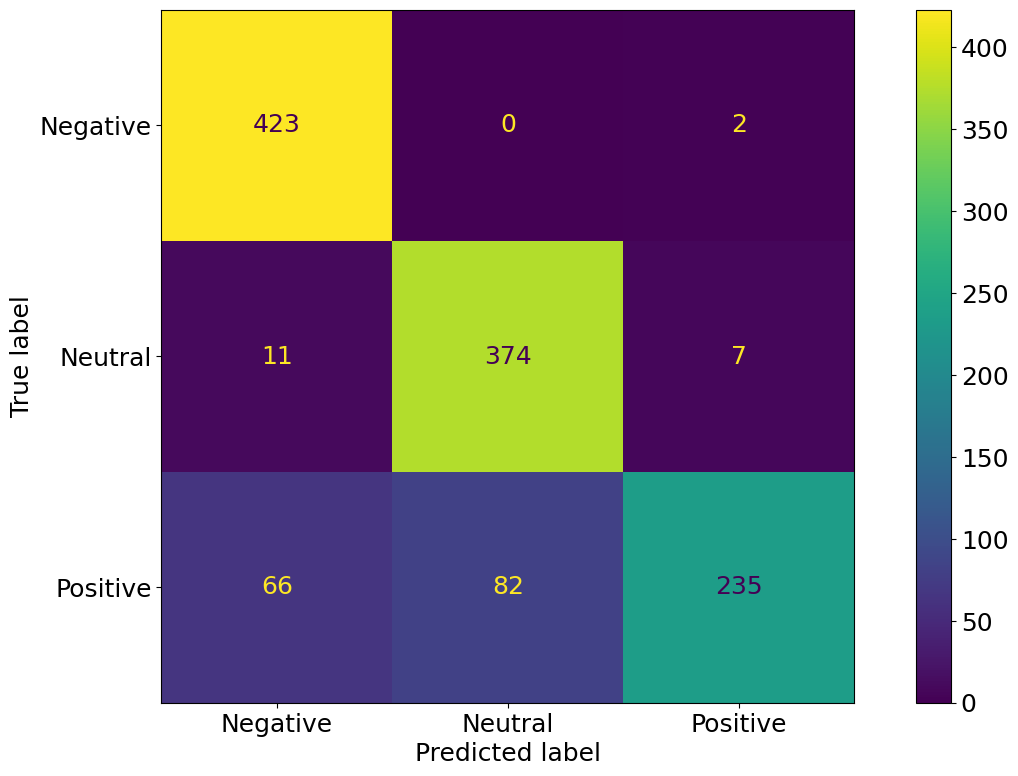

In [53]:
cm = metrics.confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Negative','Neutral','Positive'])


El modelo de Regresión Logística ajustado con los hiperparámetros determinados tiene una precisión excelente de la clase Negativa ya que raramente confunde reseñas negativas con otras categorías. Sin embargo, la clase positiva presenta la mayor confusión, especialmente con neutrales pues la matriz muestra que 82 reseñas positivas fueron clasificadas como neutrales, representando el error más frecuente del modelo. Esto sugiere que algunas expresiones positivas en las reseñas podrían ser demasiado sutiles para el modelo. Por el lado de las reseñas neutrales, el modelo tiene un rendimiento sólido con 374 reseñas neutrales que fueron correctamente clasificadas mientras que las incorrectas fueron 7 falsos positivos y 11 falsos negativos.

In [54]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.91       425
           1       0.82      0.95      0.88       392
           2       0.96      0.61      0.75       383

    accuracy                           0.86      1200
   macro avg       0.88      0.85      0.85      1200
weighted avg       0.87      0.86      0.85      1200



Con una **Precision** global del 86%, el modelo de Regresión Logística demuestra un rendimiento sólido para la tarea de clasificación de sentimiento en reseñas de equipos musicales.

El modelo muestra un **Recall** perfecto (1.00) para la clase negativa, lo que indica que es extremadamente efectivo identificando opiniones negativas. Esto resulta particularmente valioso para sistemas de alerta temprana de problemas con productos.

El modelo presenta un bajo **Recall** (0.61) para reseñas positivas, frecuentemente clasificándolas como neutrales o negativas. Sin embargo, cuando el modelo predice que una reseña es positiva, esta predicción es altamente confiable (**Precision** de 0.96).

El **F1-score promedio** de 0.85 indica un buen equilibrio entre **Precision** y **Recall** en todas las clases, aunque con oportunidad de mejora en la clase positiva.

## SVC con ajuste de hiperparámetros

In [55]:
param_grid = {
    'C': np.logspace(-2, 2, 5),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'sigmoid']
}
clf = GridSearchCV(SVC(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

SVC(C=np.float64(10.0), random_state=0)
The mean accuracy of the model is: 0.9216666666666666


In [56]:
logreg = SVC(C=10.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


### Métricas de clasificación

La matriz de confusión muestra la comparación entre las etiquetas verdaderas (True label) y las predicciones del modelo (Predicted label) para la clasificación de sentimiento en reseñas de equipos musicales.

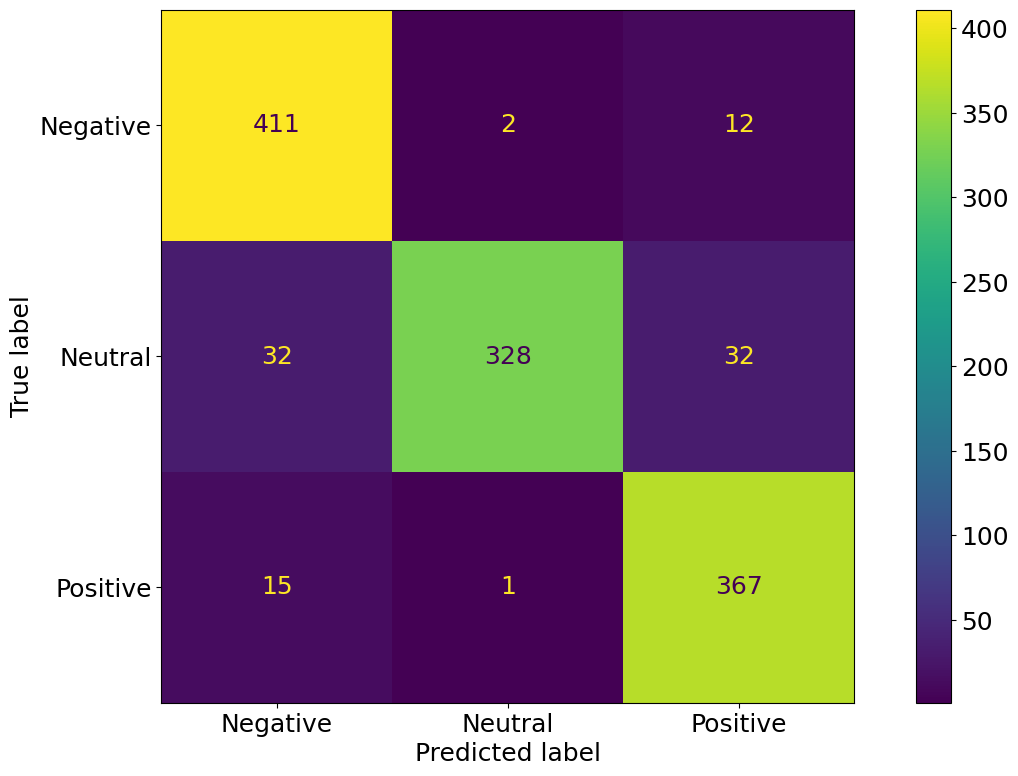

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Negative','Neutral','Positive'])

Se han realizado una evaluación del modelo de SVC ajustado por los hiperparámetros obtenidos. Evidentemente el modelo clasifica muy bien para las clases Negativas y Positivas. Sin embargo, la clase Neutral es la más confusa pues presenta errores significativos al predecirla, pronosticando 32 veces como negativo y otras 32 veces como positiva cuando el valor real era Neutral.


In [58]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       425
           1       0.99      0.84      0.91       392
           2       0.89      0.96      0.92       383

    accuracy                           0.92      1200
   macro avg       0.93      0.92      0.92      1200
weighted avg       0.93      0.92      0.92      1200



Del Reporte de Clasificación se puede asegurar que el rendimiento general es muy bueno con un 92% de **Accuracy**.

Si bien la **Precision** es casi perfecta cuando predice que la reseña es Neutral, muchas predicciones de Neutral reales fueron clasificadas como otras clases.

Tanto la Clase Negative (0) y Positive (2) tienen **Precision** y **Recall** mayores a 0.89, lo que sugiere que el modelo logra captar correctamente estos casos y predecirlos con certeza.

En definitiva, es posible que la clase Neutral sea la más problemática y al predecirla se solape más con características de las otras clases, haciendo difícil su discriminación.


# **Conclusiones**

El presente proyecto abordó la tarea de extraer conocimiento de reseñas de equipos musicales mediante técnicas de procesamiento de lenguaje natural y aprendizaje automático. Los objetivos planteados inicialmente, centrados en el *desarrollo de un sistema de análisis de sentimiento*, la *implementación de un modelo predictivo de calificaciones*, y la *extracción de temas y características clave*, fueron alcanzados satisfactoriamente.

En cuanto al *análisis de sentimiento*, se logró implementar un sistema efectivo para la clasificación de reseñas. La vectorización del texto se realizó mediante la técnica TF-IDF. Se evaluaron diversos algoritmos, incluyendo Regresión Logística, XGBoost, KNN, SVC y Random Forest, con validación cruzada demostrando el modelo **SVC** y el de **Regresión Logística** la mejor exactitud de prueba. Este último algoritmo exhibe una alta capacidad para distinguir entre reseñas positivas, negativas y neutras, siendo particularmente eficaz en la identificación de opiniones negativas, donde el modelo de Regresión Logística alcanzó un recall de 1.00.

La creación de un *modelo predictivo de calificaciones* también resultó exitosa. Para ello, se aplicaron técnicas de procesamiento de texto como stemming y TF-IDF con bigramas, y se implementaron métodos de balanceo de clases para abordar el desequilibrio en los datos. El **modelo SVC** seleccionado para esta tarea alcanzó una **precisión del 92%**, confirmando su capacidad para predecir calificaciones a partir del contenido textual. Las métricas de clasificación obtenidas reflejan un rendimiento sobresaliente en la predicción de reseñas tanto negativas como positivas, aunque se observó una mayor dificultad en la clasificación de las reseñas neutras.

Adicionalmente, se logró la *identificación de temas y características clave* presentes en las reseñas. Este proceso se llevó a cabo mediante el análisis de frecuencia de n-gramas por tipo de sentimiento y la visualización a través de wordclouds. Esto permitió identificar patrones lingüísticos recurrentes y características específicas que los usuarios valoran o critican, tales como la durabilidad, la facilidad de uso, fallos técnicos y problemas de funcionamiento.

Como hallazgos adicionales, se identificó una tendencia de **aumento de reseñas positivas** a partir de 2010, con un pico en 2013, y una disminución en 2014. La mayoría de las reseñas son **concisas**, con menos de 200 palabras, y presentan una polaridad predominantemente positiva. Se confirmó que la clasificación de **reseñas neutras** representa un desafío mayor para los modelos, a diferencia de las reseñas positivas y negativas, que son más fácilmente identificables por sus patrones lingüísticos distintivos.

En síntesis, este proyecto ha **validado** la viabilidad de aplicar técnicas avanzadas de procesamiento de lenguaje natural para transformar reseñas de equipos musicales en conocimiento accionable. Los modelos desarrollados ofrecen una herramienta **robusta** para la identificación de patrones lingüísticos asociados a diferentes niveles de satisfacción y para la predicción precisa de calificaciones, **cumpliendo** así con los objetivos establecidos.


### Para un siguiente proyecto, se propone:

1. **Mejoras en el Procesamiento del Lenguaje**

* **Implementar lemmatización en lugar de stemming**: Sustituir el stemming por lemmatización para preservar el significado semántico completo de las palabras, lo que podría mejorar la precisión en la clasificación de sentimientos, especialmente para las reseñas neutrales.

* **Análisis de negaciones y modificadores**: Desarrollar un sistema que detecte específicamente estructuras lingüísticas como negaciones o modificadores que alteran el sentido de una frase (ej. "no es malo" ≠ "es malo" o conservando términos clave como "very").

2. **Mejoras del Modelo SVC**

* **Mayor preprocesamiento de características**: especialmente si los datos son texto (como análisis de sentimientos), podría reducir ambigüedad en la clase Neutral.

* **Analizar errores específicos**: por ej. los 32 + 32 = 64 errores en clase Neutral, para entender qué patrones los provocan.


3. **Ampliación del Modelo Predictivo**

* **Redes neuronales recurrentes (RNN/LSTM/GRU)**: Experimentar con arquitecturas de redes neuronales que capturan mejor la secuencialidad del texto para mejorar la precisión predictiva.

* **Clasificación de aspectos específicos**: Desarrollar modelos para identificar y clasificar aspectos particulares de los productos (calidad de sonido, durabilidad, facilidad de uso) de forma independiente.

